In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from dateutil.parser import parse
import datetime

import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARMA

from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree, svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [32]:
df = pd.read_csv('./Price_St_Weather.csv', parse_dates=['Date'])

## ARMA Modeling

In [207]:
ar1 = ARMA(endog = df['Hourly_Entries'], # Y variable
           order = (1, 0)) # (p, q) <--- talk about q later 

model = ar1.fit()
preds = model.predict() # generated prdicted values
r2_score(preds, df['Hourly_Entries'])

-4.425722835860875

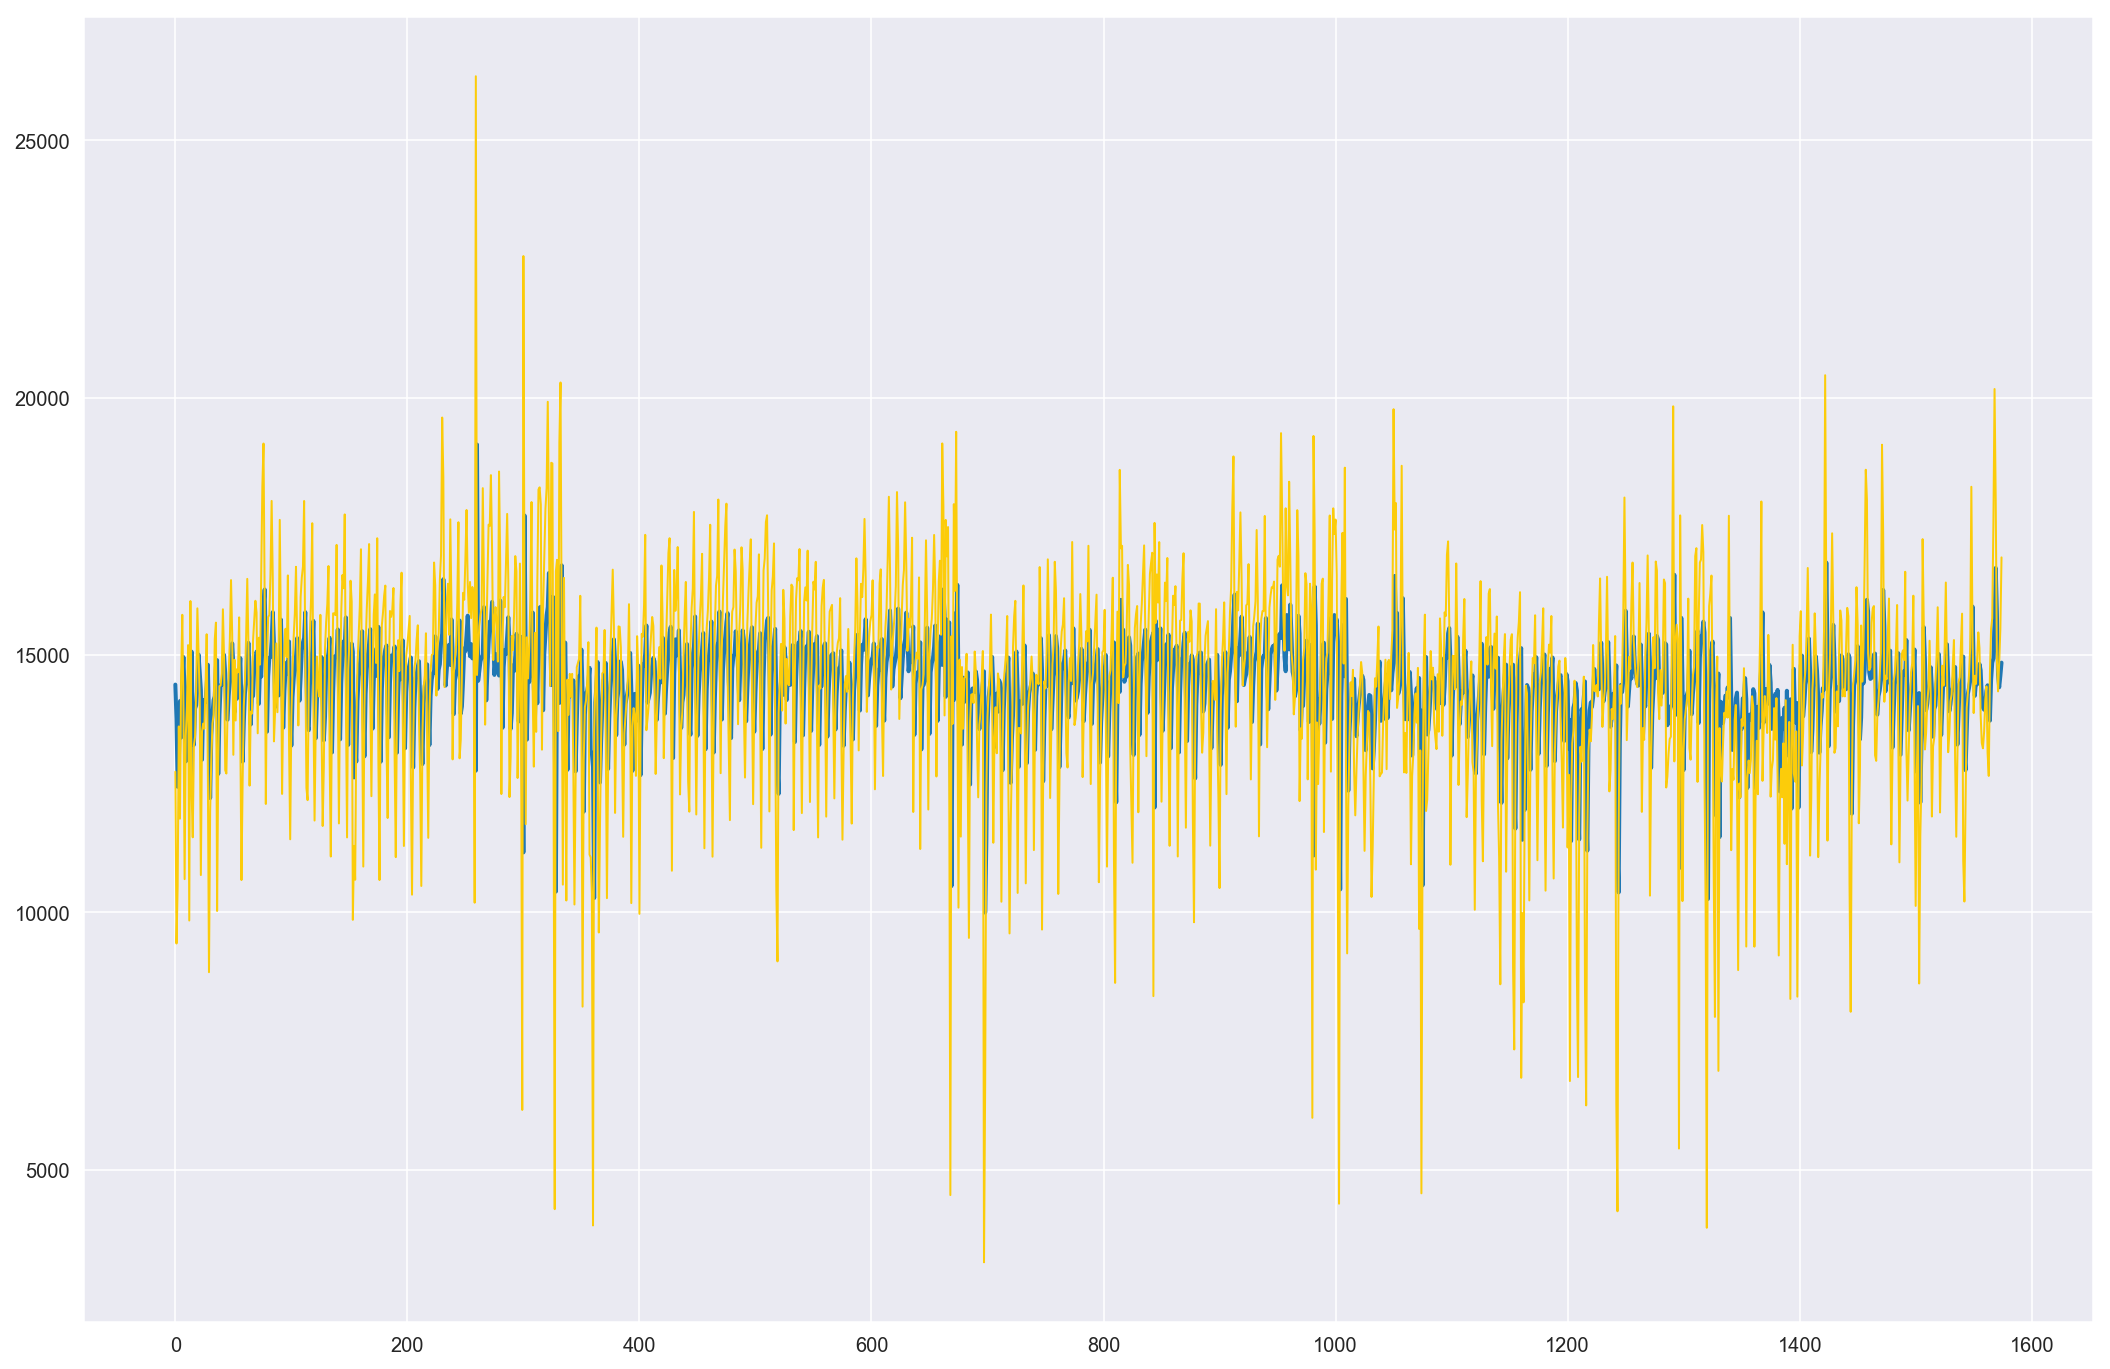

In [44]:
# Results from the AR(1) model.
fig, ax = plt.subplots(figsize = (18, 12))
plt.plot(preds,linewidth=2)
plt.plot(df['Hourly_Entries'], linewidth=1, color='#FCCC0A')
plt.show()

In [45]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:         Hourly_Entries   No. Observations:                 1575
Model:                     ARMA(1, 0)   Log Likelihood              -14213.641
Method:                       css-mle   S.D. of innovations           2009.300
Date:                Sun, 21 Oct 2018   AIC                          28433.282
Time:                        08:07:04   BIC                          28449.368
Sample:                             0   HQIC                         28439.260
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.443e+04     83.601    172.547      0.000    1.43e+04    1.46e+04
ar.L1.Hourly_Entries     0.3946      0.023     17.042      0.000       0.349       0.440
            

In [208]:
for i in range(2,15):
    ar = ARMA(endog = df['Hourly_Entries'],
              order = (i, 0)) # (p, q)
    model = ar.fit()
    preds = model.predict()
    print("AR(" + str(i) + ") returns an R-squared value of: " + str(r2_score(preds, df['Hourly_Entries'])))

AR(2) returns an R-squared value of: -3.795629088297501
AR(3) returns an R-squared value of: -3.7623606900315076
AR(4) returns an R-squared value of: -3.7158781286719114
AR(5) returns an R-squared value of: -3.7034466033617326
AR(6) returns an R-squared value of: -1.8296081823952952
AR(7) returns an R-squared value of: -0.8608127632678113
AR(8) returns an R-squared value of: -0.8212370937780231
AR(9) returns an R-squared value of: -0.8071911696057574
AR(10) returns an R-squared value of: -0.8070291874852502
AR(11) returns an R-squared value of: -0.8061307120698633
AR(12) returns an R-squared value of: -0.8038861603244427
AR(13) returns an R-squared value of: -0.7619385990408833
AR(14) returns an R-squared value of: -0.7109646728240708


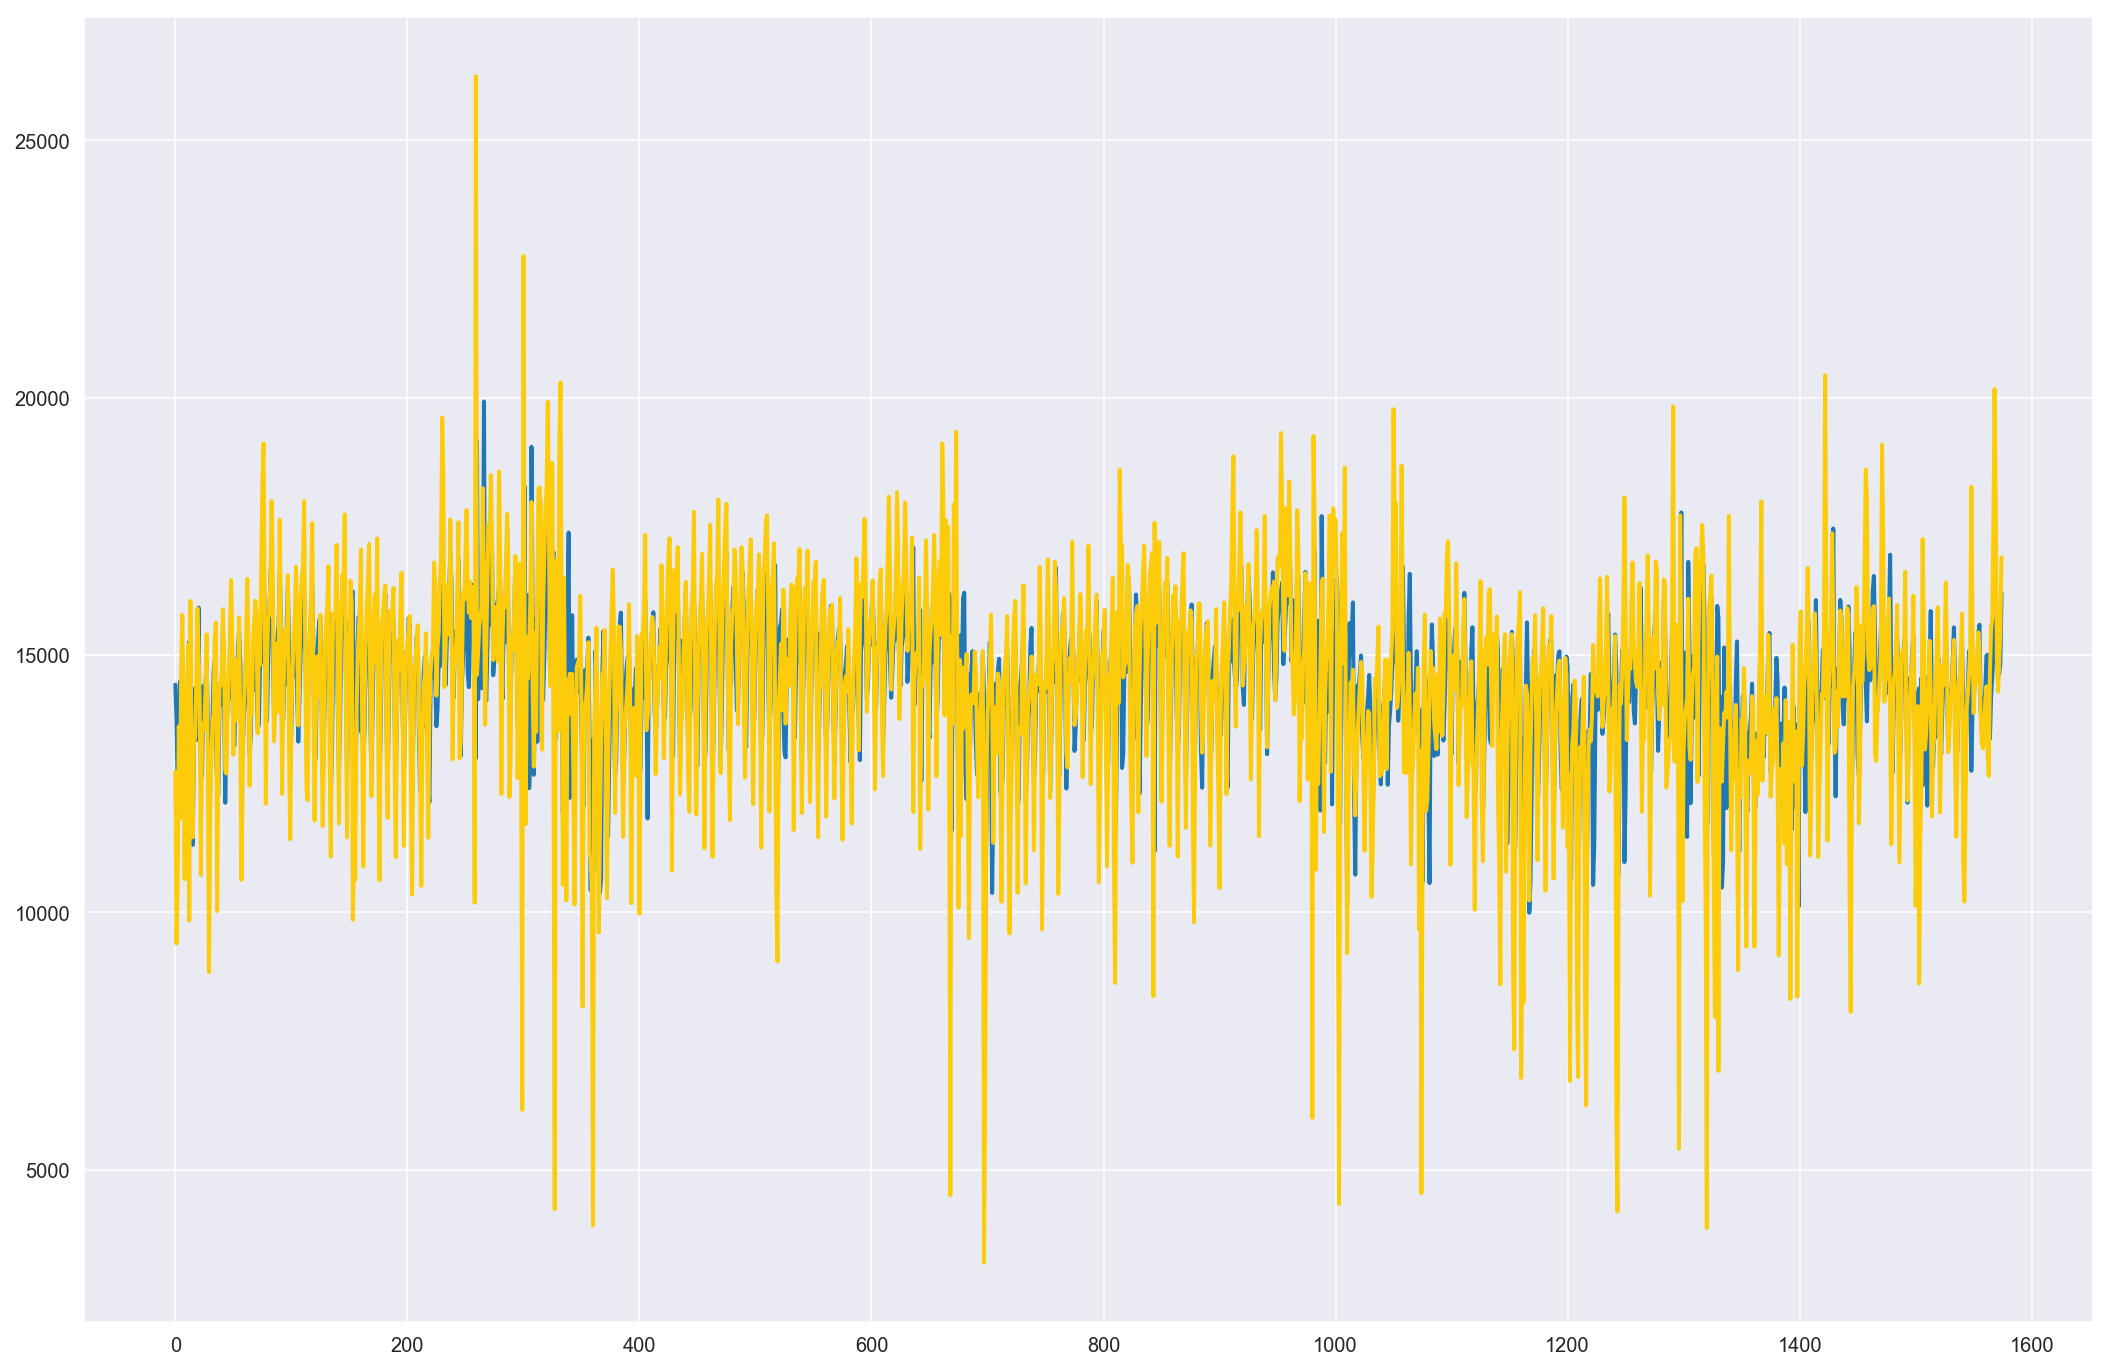

In [53]:
# Results from the AR(14) model.
fig, ax = plt.subplots(figsize = (18, 12))
plt.plot(preds,linewidth=2)
plt.plot(df['Hourly_Entries'], linewidth=2, color='#FCCC0A')
plt.show()

In [54]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:         Hourly_Entries   No. Observations:                 1575
Model:                    ARMA(14, 0)   Log Likelihood              -13984.471
Method:                       css-mle   S.D. of innovations           1736.124
Date:                Sun, 21 Oct 2018   AIC                          28000.942
Time:                        08:12:31   BIC                          28086.734
Sample:                             0   HQIC                         28032.824
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.442e+04    155.961     92.481      0.000    1.41e+04    1.47e+04
ar.L1.Hourly_Entries      0.3584      0.025     14.302      0.000       0.309       0.407
ar.L2.Ho

## Moving Average Models

In [56]:
ma1 = ARMA(endog = df['Hourly_Entries'],
           order = (0, 1)) # (p,q)

model = ma1.fit()
preds = model.predict()
r2_score(df['Hourly_Entries'], preds)

0.17170941045911114

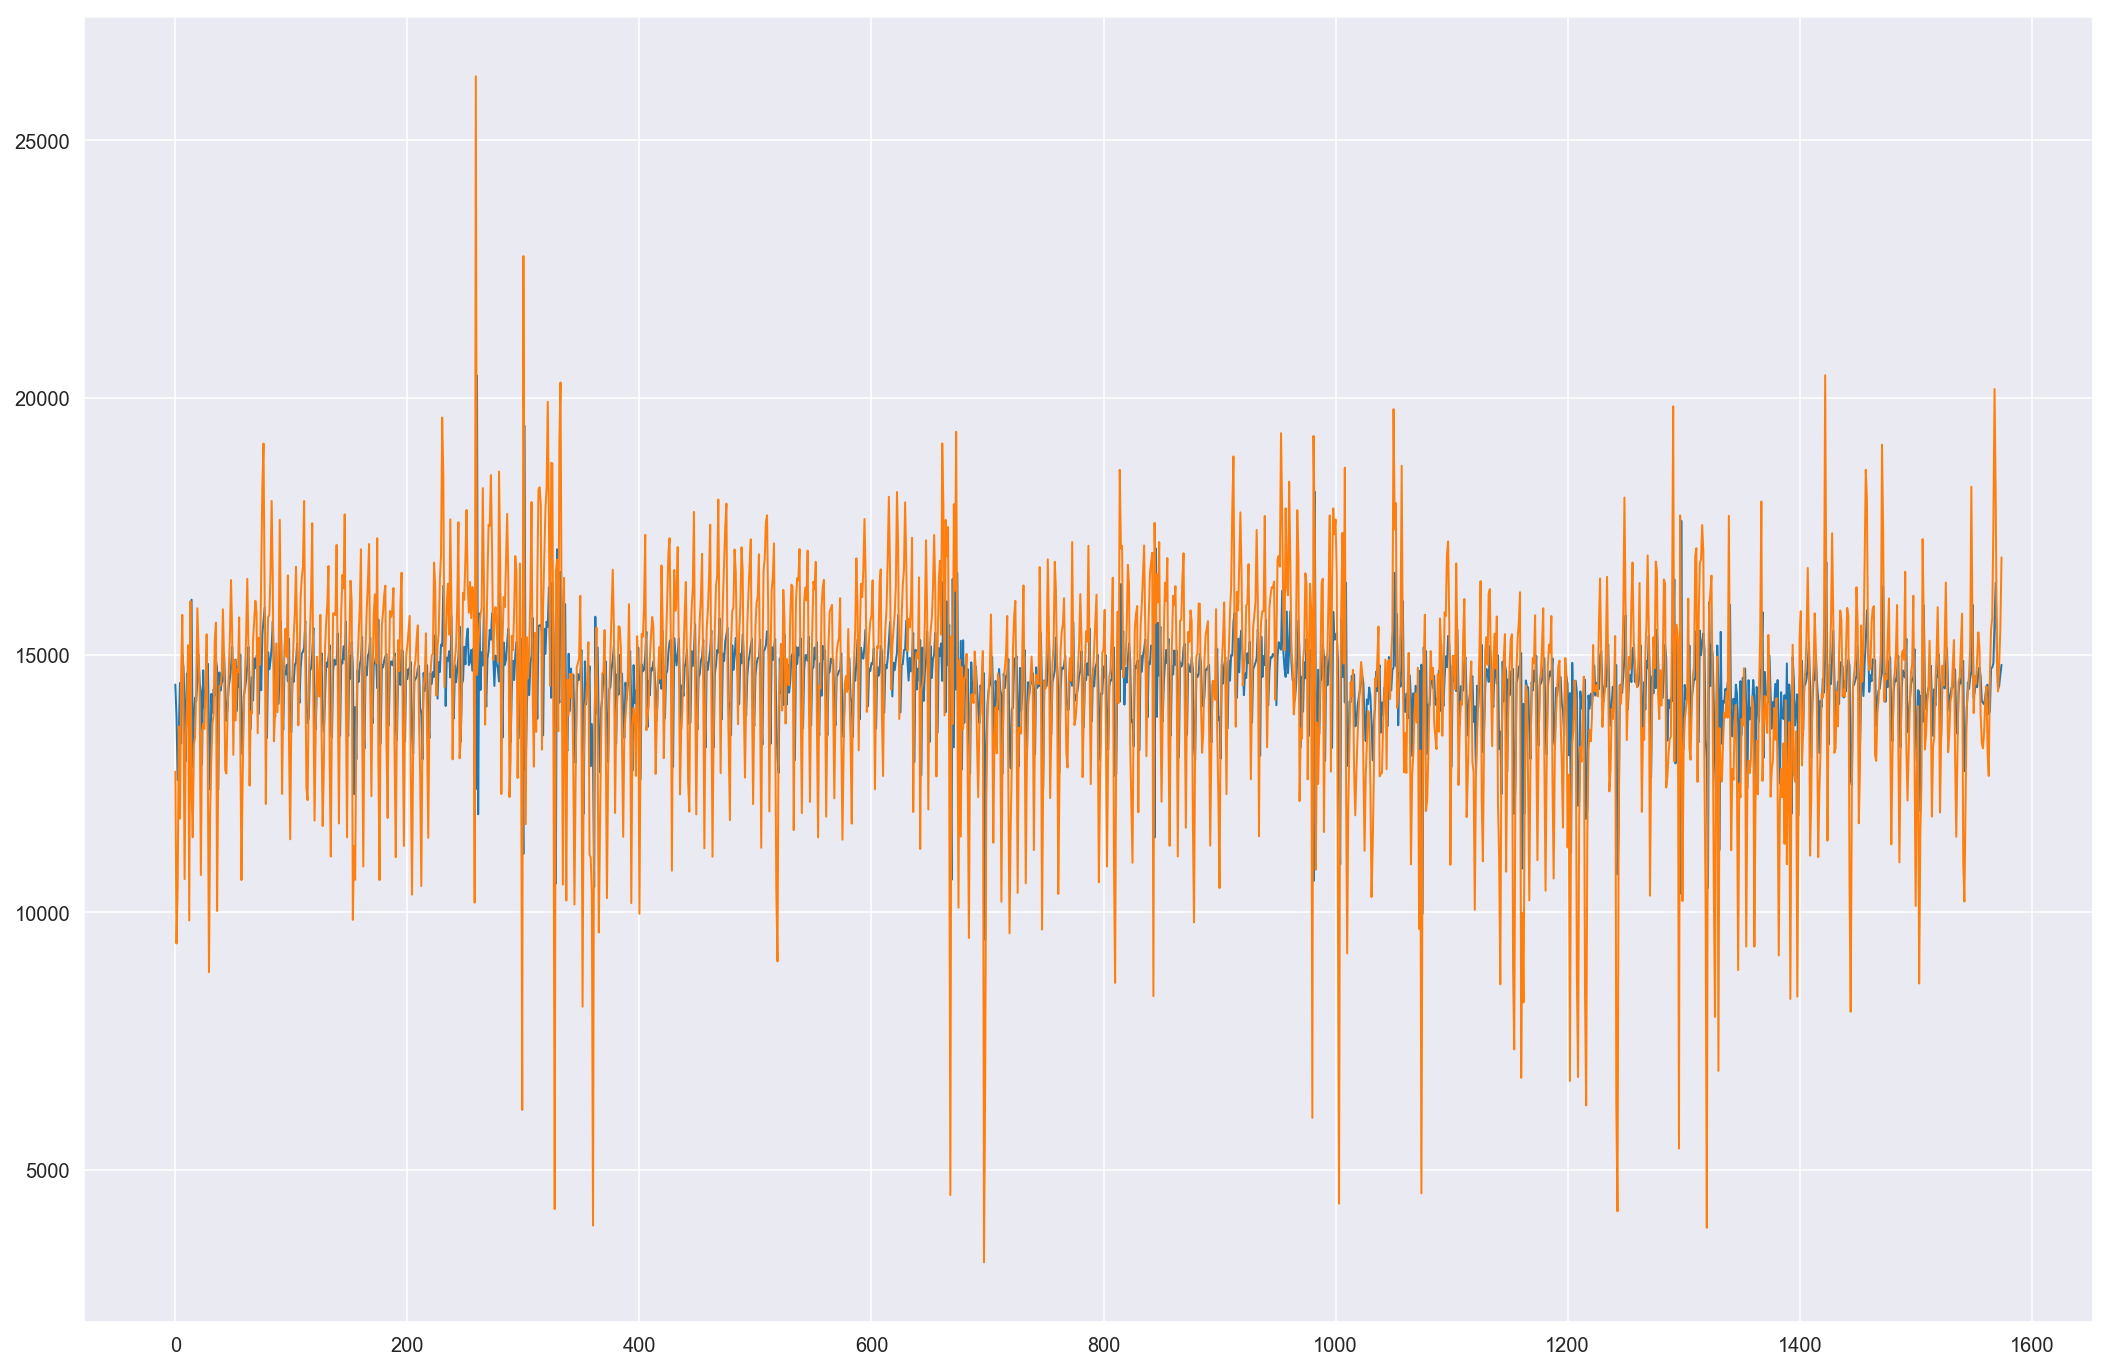

In [57]:
# Results from the MA(1) model.
fig, ax = plt.subplots(figsize = (18, 12))
plt.plot(preds,linewidth=1)
plt.plot(df['Hourly_Entries'], linewidth=1)
plt.show()

In [62]:
for i in range(2,15):
    ma = ARMA(endog = df['Hourly_Entries'],
              order = (0, i)) # (p, q)
    model = ma.fit()
    preds = model.predict()
    print("MA(" + str(i) + ") returns an R-squared value of: " + str(r2_score(preds, df['Hourly_Entries'])))

MA(2) returns an R-squared value of: -3.7208428909525395
MA(3) returns an R-squared value of: -3.7118574530095225
MA(4) returns an R-squared value of: -3.648122350264938
MA(5) returns an R-squared value of: -3.022135335160085
MA(6) returns an R-squared value of: -1.4597438628114028
MA(7) returns an R-squared value of: -2.8275635361776685
MA(8) returns an R-squared value of: -1.7978914526347811
MA(9) returns an R-squared value of: -1.784766976087158
MA(10) returns an R-squared value of: -1.7813709697354847
MA(11) returns an R-squared value of: -1.7374986491845337
MA(12) returns an R-squared value of: -1.6067176521594884
MA(13) returns an R-squared value of: -1.5792527760459443
MA(14) returns an R-squared value of: -1.498918807466945


In [63]:
ma6 = ARMA(endog = df['Hourly_Entries'],
           order = (0, 6)) # (p,q)

model = ma6.fit()
preds = model.predict()
r2_score(df['Hourly_Entries'], preds)

0.20122441807991842

In [64]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:         Hourly_Entries   No. Observations:                 1575
Model:                     ARMA(0, 6)   Log Likelihood              -14169.957
Method:                       css-mle   S.D. of innovations           1954.058
Date:                Sun, 21 Oct 2018   AIC                          28355.915
Time:                        08:21:03   BIC                          28398.811
Sample:                             0   HQIC                         28371.856
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.443e+04     75.123    192.018      0.000    1.43e+04    1.46e+04
ma.L1.Hourly_Entries     0.5415      0.027     20.125      0.000       0.489       0.594
ma.L2.Hourly

In [230]:
arma76 = ARMA(endog = df['Hourly_Entries'].dropna(),
           order = (7, 6)) # (p,q)

model = arma76.fit()
preds = model.predict()
r2_score(df['Hourly_Entries'].dropna(), preds)

0.39104820058381995

In [212]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:         Hourly_Entries   No. Observations:                 1575
Model:                     ARMA(7, 6)   Log Likelihood              -13955.565
Method:                       css-mle   S.D. of innovations           1703.801
Date:                Sun, 21 Oct 2018   AIC                          27941.130
Time:                        15:25:30   BIC                          28021.560
Sample:                             0   HQIC                         27971.020
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.443e+04    175.323     82.277      0.000    1.41e+04    1.48e+04
ar.L1.Hourly_Entries     1.0725      0.079     13.515      0.000       0.917       1.228
ar.L2.Hourly

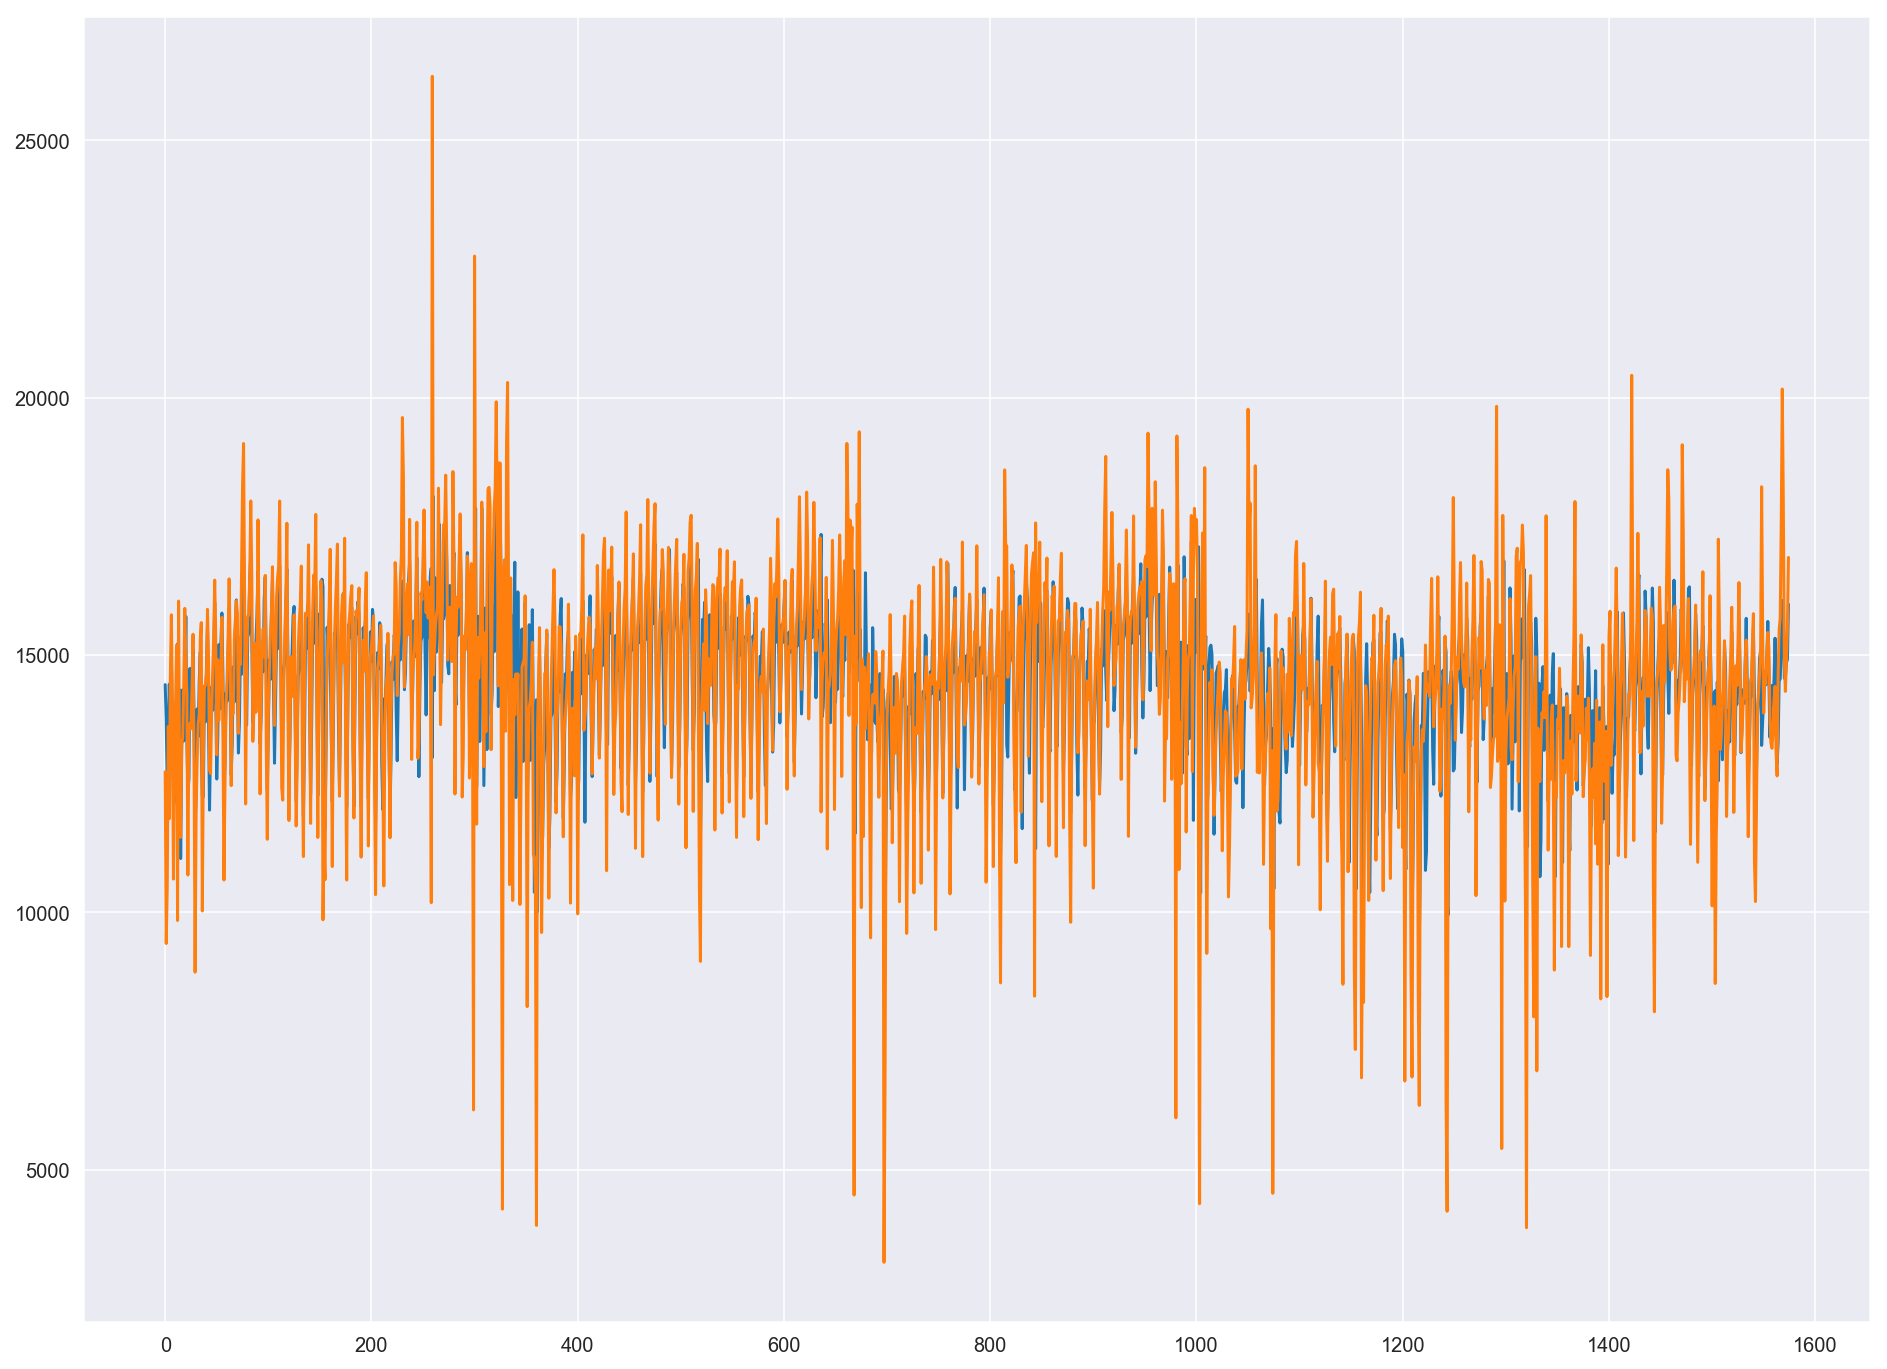

In [213]:
# Results from the ARMA(7,6) model.
fig, ax = plt.subplots(figsize = (16, 12))
plt.plot(preds)
plt.plot(df['Hourly_Entries'])
plt.show()

In [231]:
from statsmodels.tsa.stattools import adfuller

dickey_fuller_test = adfuller(df['Hourly_Entries'])

In [232]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2],
                        index = ['Test Statistic',
                                 'p-value'])
    return dfoutput

In [233]:
interpret_dftest(adfuller(df['Hourly_Entries']))

Test Statistic   -5
p-value           0
dtype: float64

## Scoring and plotting function

In [227]:
def scoring_metrics(model):
    
    scorer = make_scorer(mean_squared_error, greater_is_better = False)

    def rmse_cv_train(model):
        rmse= np.sqrt(-cross_val_score(model, X_train_scaled, y_train, scoring = scorer, cv = 10))
        return(rmse)
    def rmse_cv_test(model):
        rmse= np.sqrt(-cross_val_score(model, X_test_scaled, y_test, scoring = scorer, cv = 10))
        return(rmse)

    print("5 fold cross validation: ",cross_val_score(model, X_test_scaled, y_test, cv=5))
    print("Mean of 5 fold cross validatoin: ",cross_val_score(model, X_test_scaled, y_test, cv=5).mean())

    print("RMSE on Training set :", rmse_cv_train(model).mean())
    print("RMSE on Test set :", rmse_cv_test(model).mean())

    y_train_hat = model.predict(X_train_scaled)
    y_test_hat = model.predict(X_test_scaled)

    print("R2 train: ", metrics.r2_score(y_train, y_train_hat))
    print("R2 test: ", metrics.r2_score(y_test, y_test_hat))
    
    plt.figure(figsize=(12,12))

    sns.regplot(y_train, y_train_hat, color='b', label = "Training Split")
    sns.regplot(y_test, y_test_hat, color='orange', label = "Test Split")
    plt.legend(loc = "upper left", fontsize=16)
    plt.xlabel("Real Entrances", alpha=.7, fontsize=16)
    plt.ylabel("Predicted Entrances", alpha=.7, fontsize=16)
    plt.title('Real Entrances vs Predicted Entrances Train and Test', fontsize=24);    

## Modeling

Train test split by taking the first 60% of dates as train and the final 40% as test. As we have approx 5 years of data, this will allow most dates to be prediced more than once in the test set. 

In [223]:
n = df.shape[0]
train_size = 0.6

prince_daily_to_be_split = df.sort_values('Date')
df_train = prince_daily_to_be_split.iloc[7:int(n * train_size)]
df_test = prince_daily_to_be_split.iloc[int(n * train_size):]

In [224]:
# to manually select features edit the X list
features = ['is_Monday', 'is_Tuesday', 'is_Wednesday',
       'is_Thursday', 'is_Friday', 'is_Saturday', 'is_Sunday', 'is_Jan',
       'is_Feb', 'is_Mar', 'is_Apr', 'is_May', 'is_Jun', 'is_Jul', 'is_Aug',
       'is_Sep', 'is_Oct', 'is_Nov', 'is_Dec',
       'Entries_lag_1', 'Entires_lag_7', 
       'Exits_lag_1', 'Exits_lag_7', 
       'is_New_Years', 'is_Easter', 'is_Memorial_Day', 'is_Independence_Day',
       'is_Labor_Day', 'is_Christmas']

#train test split, set random state
X_train = df_train[features]
X_test = df_test[features]
y_train = df_train['Hourly_Entries']
y_test = df_test['Hourly_Entries']

# show shape of splits
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (938, 29)
X_test : (630, 29)
y_train : (938,)
y_test : (630,)


In [225]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

Best alpha : 10.0
Try again for more precision with alphas centered around 10.0
Best alpha : 14.0
5 fold cross validation:  [0.4630949  0.52187613 0.38989467 0.30767419 0.24767468]
Mean of 5 fold cross validatoin:  0.3860429136426205
RMSE on Training set : 1161.2503573405368
RMSE on Test set : 1686.5588200052284
R2 train:  0.6736893915311235
R2 test:  0.41911098230881394


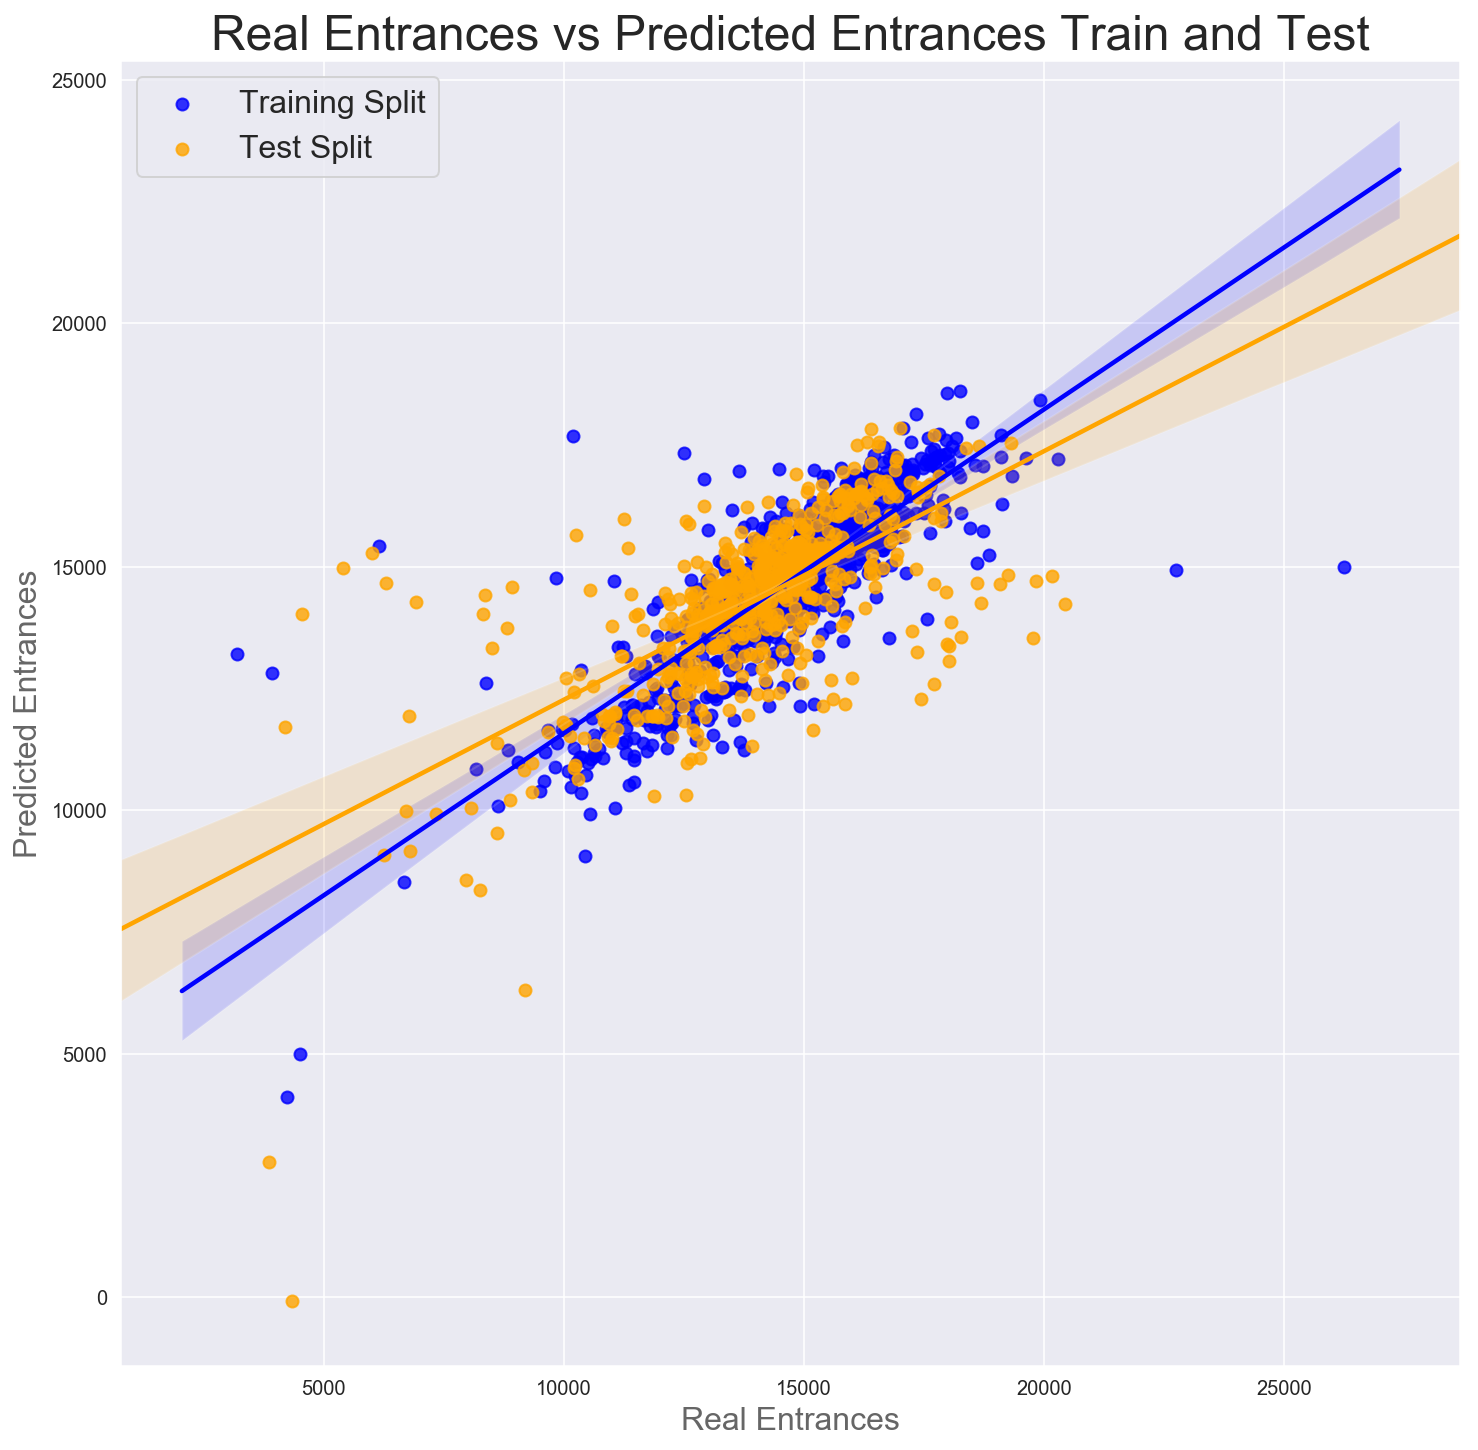

In [226]:
#Ridge
model = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6,
                          1, 3, 6, 10, 30, 60, 100, 300, 600,
                          1000, 3000, 6000])
model.fit(X_train_scaled, y_train)
alpha = model.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
model = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha,  alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
model.fit(X_train_scaled, y_train)
alpha = model.alpha_
print("Best alpha :", alpha)

scoring_metrics(model)

#### Coefs

In [206]:
coef_train = pd.DataFrame(X_train, index=y_train.index, columns=(X_train.columns))
coefs = pd.Series(ridge.coef_, index = coef_train.columns)
coef_train['Hourly_Entries'] = y_train

pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:.4f}'.format
#Look at the corrs for the Combined Regression Subset
corrs_train = (coef_train.corr()['Hourly_Entries'])
print(corrs_train.sort_values(ascending=False))

Hourly_Entries         1.0000
Exits_lag_7            0.5632
Entires_lag_7          0.5627
Exits_lag_1            0.3634
is_Friday              0.3519
Entries_lag_1          0.3503
is_Oct                 0.1532
is_Thursday            0.1505
is_Wednesday           0.1338
is_Dec                 0.1290
is_Sep                 0.0655
is_Tuesday             0.0516
is_Nov                 0.0494
is_Apr                 0.0452
is_Jun                 0.0417
is_May                 0.0214
is_Jul                 0.0015
is_Saturday           -0.0134
is_Aug                -0.0453
is_Memorial_Day       -0.0838
is_Mar                -0.0926
is_New_Years          -0.0980
is_Easter             -0.0989
is_Independence_Day   -0.1018
is_Labor_Day          -0.1040
is_Monday             -0.1354
is_Feb                -0.1474
is_Jan                -0.2108
is_Christmas          -0.2301
is_Sunday             -0.5376
Name: Hourly_Entries, dtype: float64


### Feature Engineering on Weather Data
Adding cubes, squares, sqaure roots, cube roots, 4th root, and log for Precipitation, Snow, Max and Min temperature.  

In [200]:
df['PRCP*3'] = df['PRCP'] ** 3
df['PRCP*2'] = df['PRCP'] ** 2
df['PRCP-sqrt'] = np.sqrt(df['PRCP'])
df['PRCP-cbrt'] = np.cbrt(df['PRCP'])
df['PRCP-4rt'] = df['PRCP'] ** (1/4)
df['PRCP-log'] = np.log(df['PRCP'])

df['SNOW*3'] = df['SNOW'] ** 3
df['SNOW*2'] = df['SNOW'] ** 2
df['SNOW-sqrt'] = np.sqrt(df['SNOW'])
df['SNOW-cbrt'] = np.cbrt(df['SNOW'])
df['SNOW-4rt'] = df['SNOW'] ** (1/4)
df['SNOW-log'] = np.log(df['SNOW'])

df['TMAX*3'] = df['TMAX'] ** 3
df['TMAX*2'] = df['TMAX'] ** 2
df['TMAX-sqrt'] = np.sqrt(df['TMAX'])
df['TMAX-cbrt'] = np.cbrt(df['TMAX'])
df['TMAX-4rt'] = df['TMAX'] ** (1/4)
df['TMAX-log'] = np.log(df['TMAX'])

df['TMIN*3'] = df['TMIN'] ** 3
df['TMIN*2'] = df['TMIN'] ** 2
df['TMIN-sqrt'] = np.sqrt(df['TMIN'])
df['TMIN-cbrt'] = np.cbrt(df['TMIN'])
df['TMIN-4rt'] = df['TMIN'] ** (1/4)
df['TMIN-log'] = np.log(df['TMIN'])

In [174]:
n = df.shape[0]
train_size = 0.6

prince_daily_to_be_split = df.sort_values('Date')
df_train = prince_daily_to_be_split.iloc[7:int(n * train_size)]
df_test = prince_daily_to_be_split.iloc[int(n * train_size):]

In [194]:
# to manually select features edit the X list
features = ['is_Monday', 'is_Tuesday', 'is_Wednesday',
       'is_Thursday', 'is_Friday', 'is_Saturday', 'is_Sunday', 'is_Jan',
       'is_Feb', 'is_Mar', 'is_Apr', 'is_May', 'is_Jun', 'is_Jul', 'is_Aug',
       'is_Sep', 'is_Oct', 'is_Nov', 'is_Dec',
       'Entries_lag_1', 'Entires_lag_7', 
       'Exits_lag_1', 'Exits_lag_7',  
       'is_New_Years', 'is_Easter', 'is_Memorial_Day', 'is_Independence_Day',
       'is_Labor_Day', 'is_Christmas',
       'PRCP', 'SNOW']

#train test split, set random state
X_train = df_train[features]
X_test = df_test[features]
y_train = df_train['Hourly_Entries']
y_test = df_test['Hourly_Entries']

# show shape of splits
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (938, 31)
X_test : (630, 31)
y_train : (938,)
y_test : (630,)


In [195]:
# Scale 
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

#### RIdgeCV

Best alpha : 30.0
Try again for more precision with alphas centered around 30.0
Best alpha : 42.0
5 fold cross validation:  [0.48914492 0.67725798 0.37615604 0.55451091 0.28225717]
Mean of 5 fold cross validatoin:  0.47586540384048126
RMSE on Training set : 1086.3099372167555
RMSE on Test set : 1546.0976829611782
R2 train:  0.7233232433339718
R2 test:  0.5060804836385493


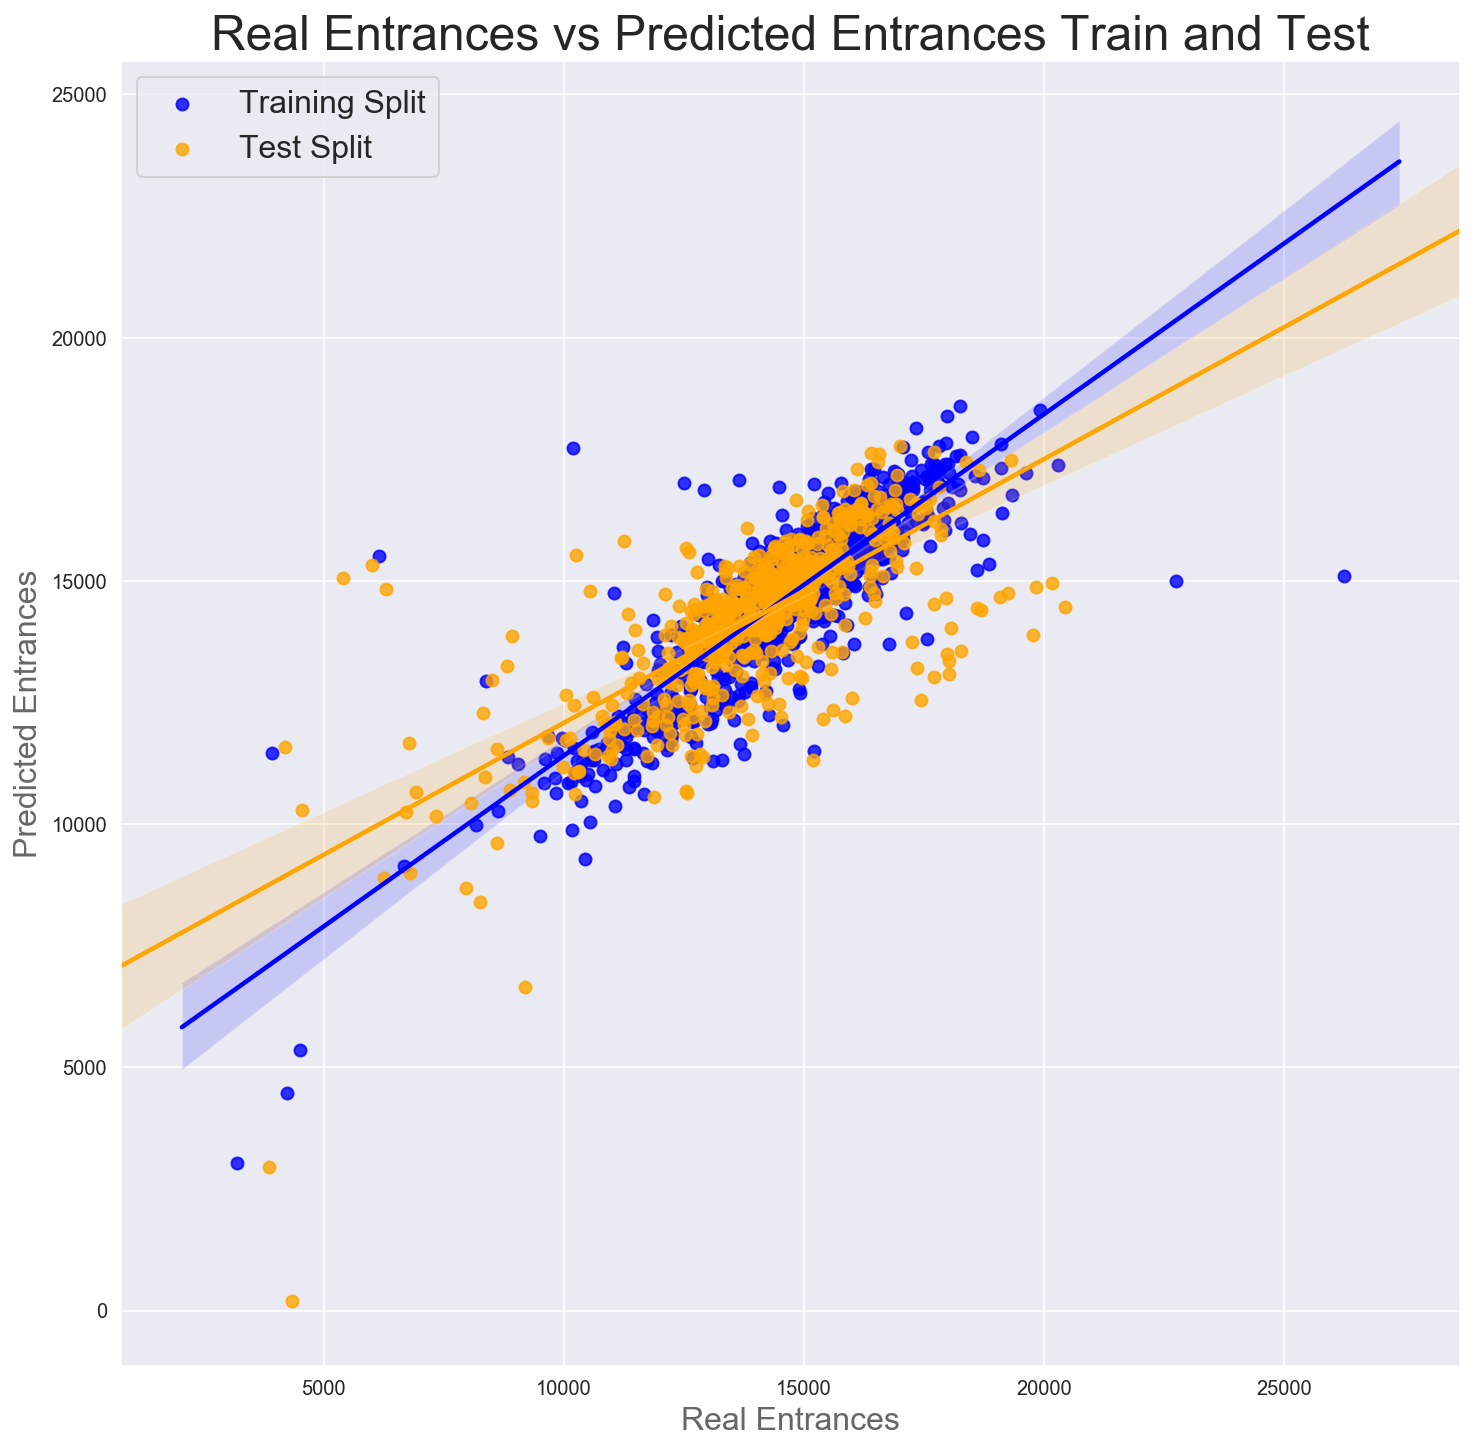

In [196]:
#Ridge
model = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6,
                          1, 3, 6, 10, 30, 60, 100, 300, 600,
                          1000, 3000, 6000])
model.fit(X_train_scaled, y_train)
alpha = model.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
model = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha,  alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
model.fit(X_train_scaled, y_train)
alpha = model.alpha_
print("Best alpha :", alpha)

scoring_metrics(model)

### Create Coefficients for features including weather

In [83]:
coef_train = pd.DataFrame(X_train, index=y_train.index, columns=(X_train.columns))
coefs = pd.Series(ridge.coef_, index = coef_train.columns)
coef_train['Hourly_Entries'] = y_train

pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:.4f}'.format
#Look at the corrs for the Combined Regression Subset
corrs_train = (coef_train.corr()['Hourly_Entries'])
print(corrs_train.sort_values(ascending=False))

Hourly_Entries         1.0000
Exits_lag_7            0.5632
Entires_lag_7          0.5627
Exits_lag_1            0.3634
is_Friday              0.3519
Entries_lag_1          0.3503
is_Oct                 0.1532
is_Thursday            0.1505
is_Wednesday           0.1338
is_Dec                 0.1290
is_Sep                 0.0655
is_Tuesday             0.0516
is_Nov                 0.0494
is_Apr                 0.0452
is_Jun                 0.0417
is_May                 0.0214
is_Jul                 0.0015
is_Saturday           -0.0134
is_Aug                -0.0453
is_Memorial_Day       -0.0838
is_Mar                -0.0926
is_New_Years          -0.0980
is_Easter             -0.0989
is_Independence_Day   -0.1018
is_Labor_Day          -0.1040
PRCP                  -0.1243
is_Monday             -0.1354
is_Feb                -0.1474
is_Jan                -0.2108
is_Christmas          -0.2301
SNOW                  -0.2484
is_Sunday             -0.5376
Name: Hourly_Entries, dtype: float64


### Check and tune other regression models

#### Lasso

Best alpha : 10.0
Try again for more precision with alphas centered around 10.0
Best alpha : 14.0
5 fold cross validation:  [0.48595054 0.68588844 0.36556438 0.54909966 0.27549765]
Mean of 5 fold cross validatoin:  0.47240013389533697
RMSE on Training set : 1083.310628230499
RMSE on Test set : 1542.0469715113284
R2 train:  0.7234814440019066
R2 test:  0.5043040887231327


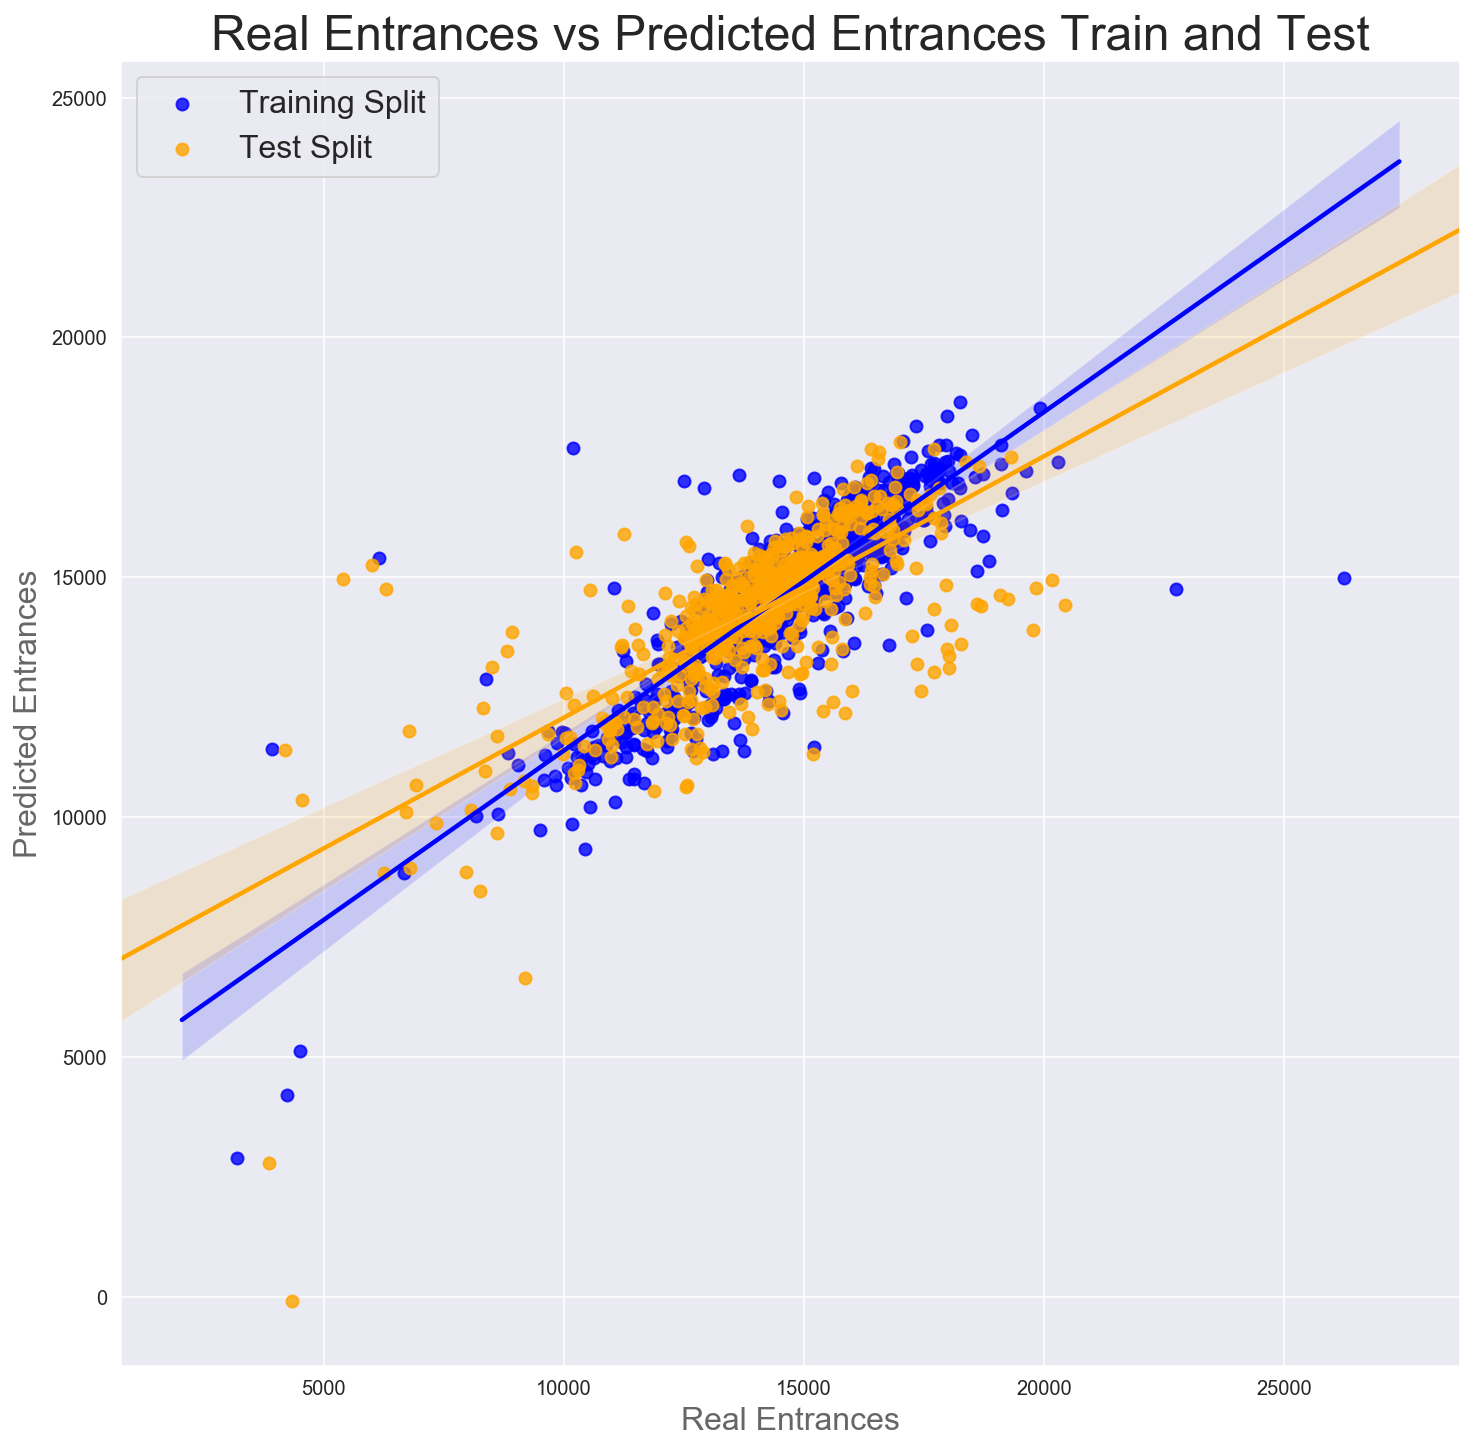

In [199]:
#Lasso
model = LassoCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6,
                          1, 3, 6, 10, 30, 60, 100, 300, 600,
                          1000, 3000, 6000])
model.fit(X_train_scaled, y_train)
alpha = model.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
model = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha,  alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
model.fit(X_train_scaled, y_train)
alpha = model.alpha_
print("Best alpha :", alpha)

scoring_metrics(model)

#### Elastic Net

Best alpha : 0.1
Try again for more precision with alphas centered around 0.1
Best alpha : 0.06999999999999999
5 fold cross validation:  [0.4876409  0.67966917 0.3748813  0.5546446  0.27756393]
Mean of 5 fold cross validatoin:  0.4748799789947604
RMSE on Training set : 1085.2233999515317
RMSE on Test set : 1546.4255891156595
R2 train:  0.7239958386179677
R2 test:  0.5048408608841564


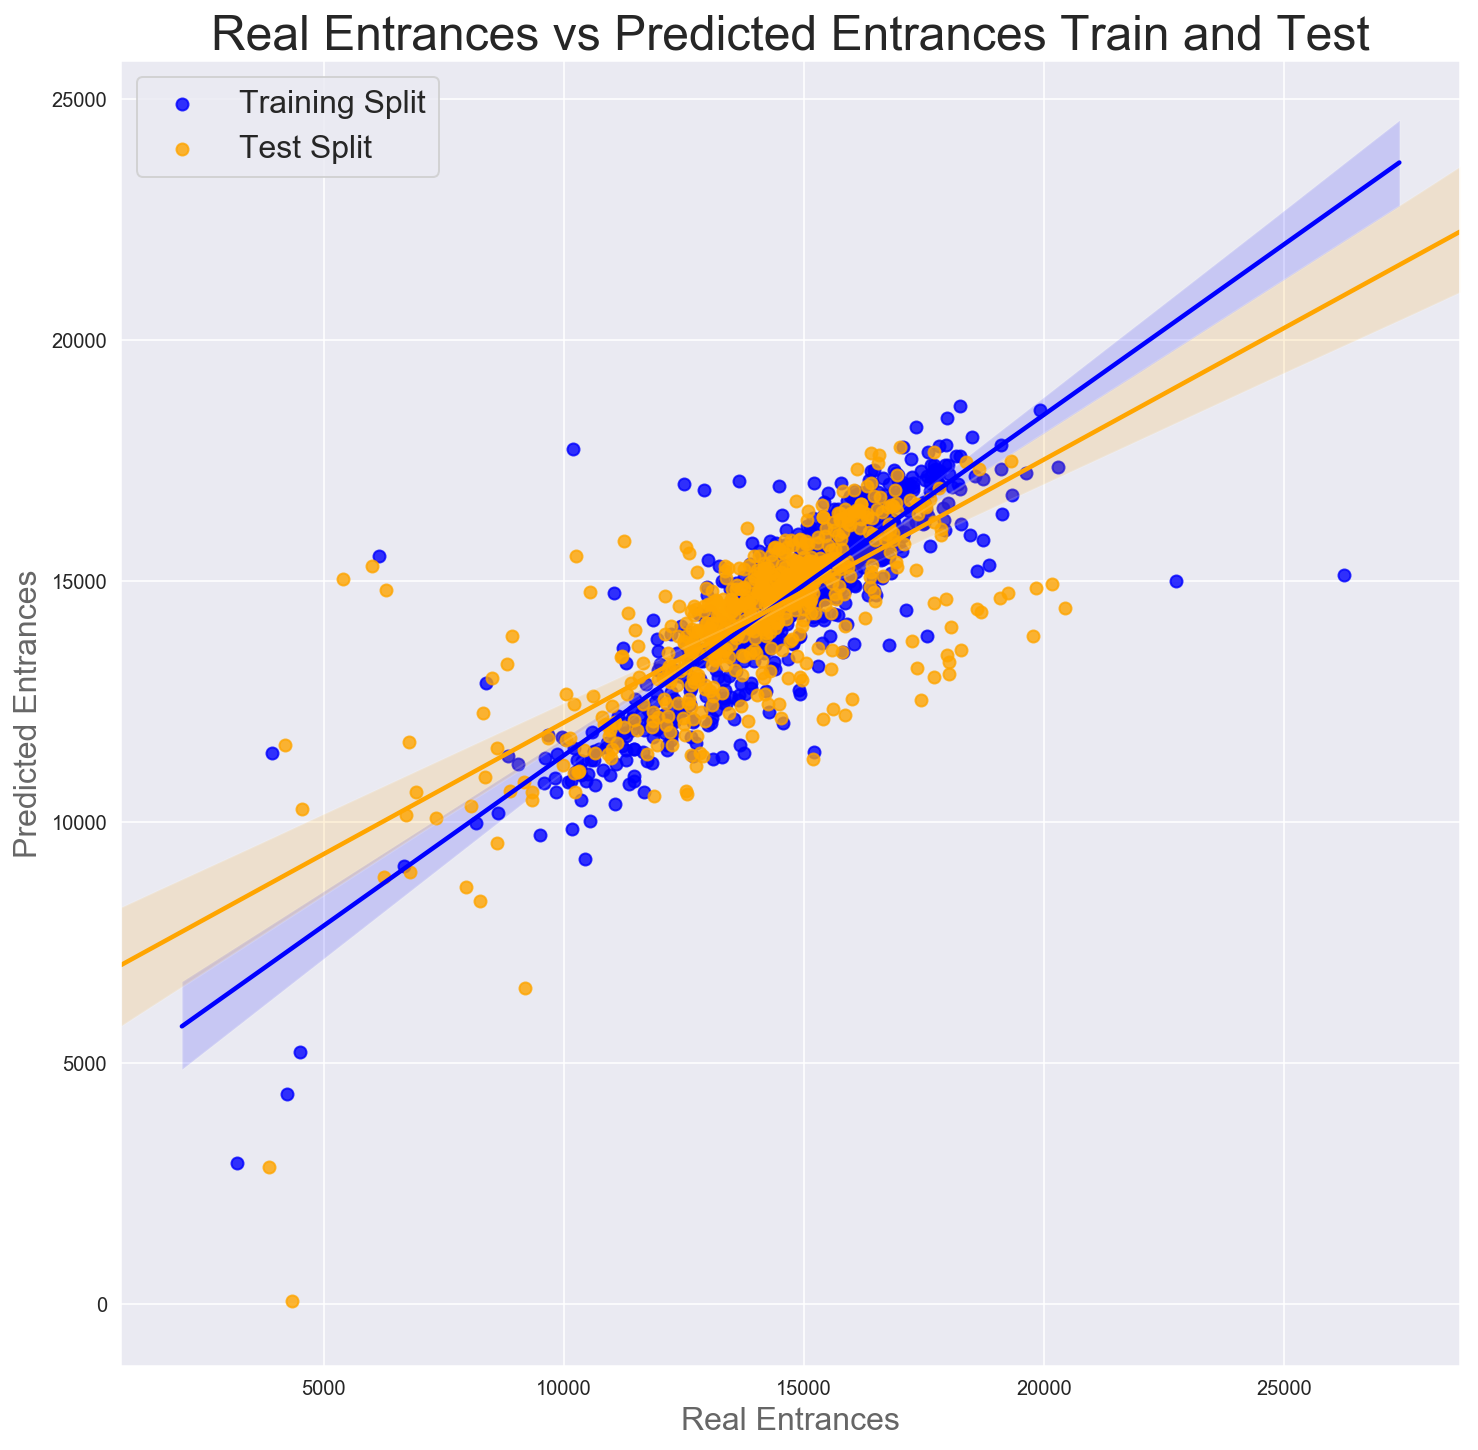

In [198]:
#Elastic Net
model = ElasticNetCV(l1_ratio=0.7, alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6,
                          1, 3, 6, 10, 30, 60, 100, 300, 600,
                          1000, 3000, 6000])
model.fit(X_train_scaled, y_train)
alpha = model.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
model= ElasticNetCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha,  alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
model.fit(X_train_scaled, y_train)
alpha = model.alpha_
print("Best alpha :", alpha)

scoring_metrics(model)

#### KNeighbors Regressor

5 fold cross validation:  [0.18400799 0.24626513 0.18799791 0.20654346 0.20247527]
Mean of 5 fold cross validatoin:  0.20545795107972173
RMSE on Training set : 1666.6746227271087
RMSE on Test set : 1953.7713382589027
R2 train:  0.396710230645306
R2 test:  0.20018321506844416


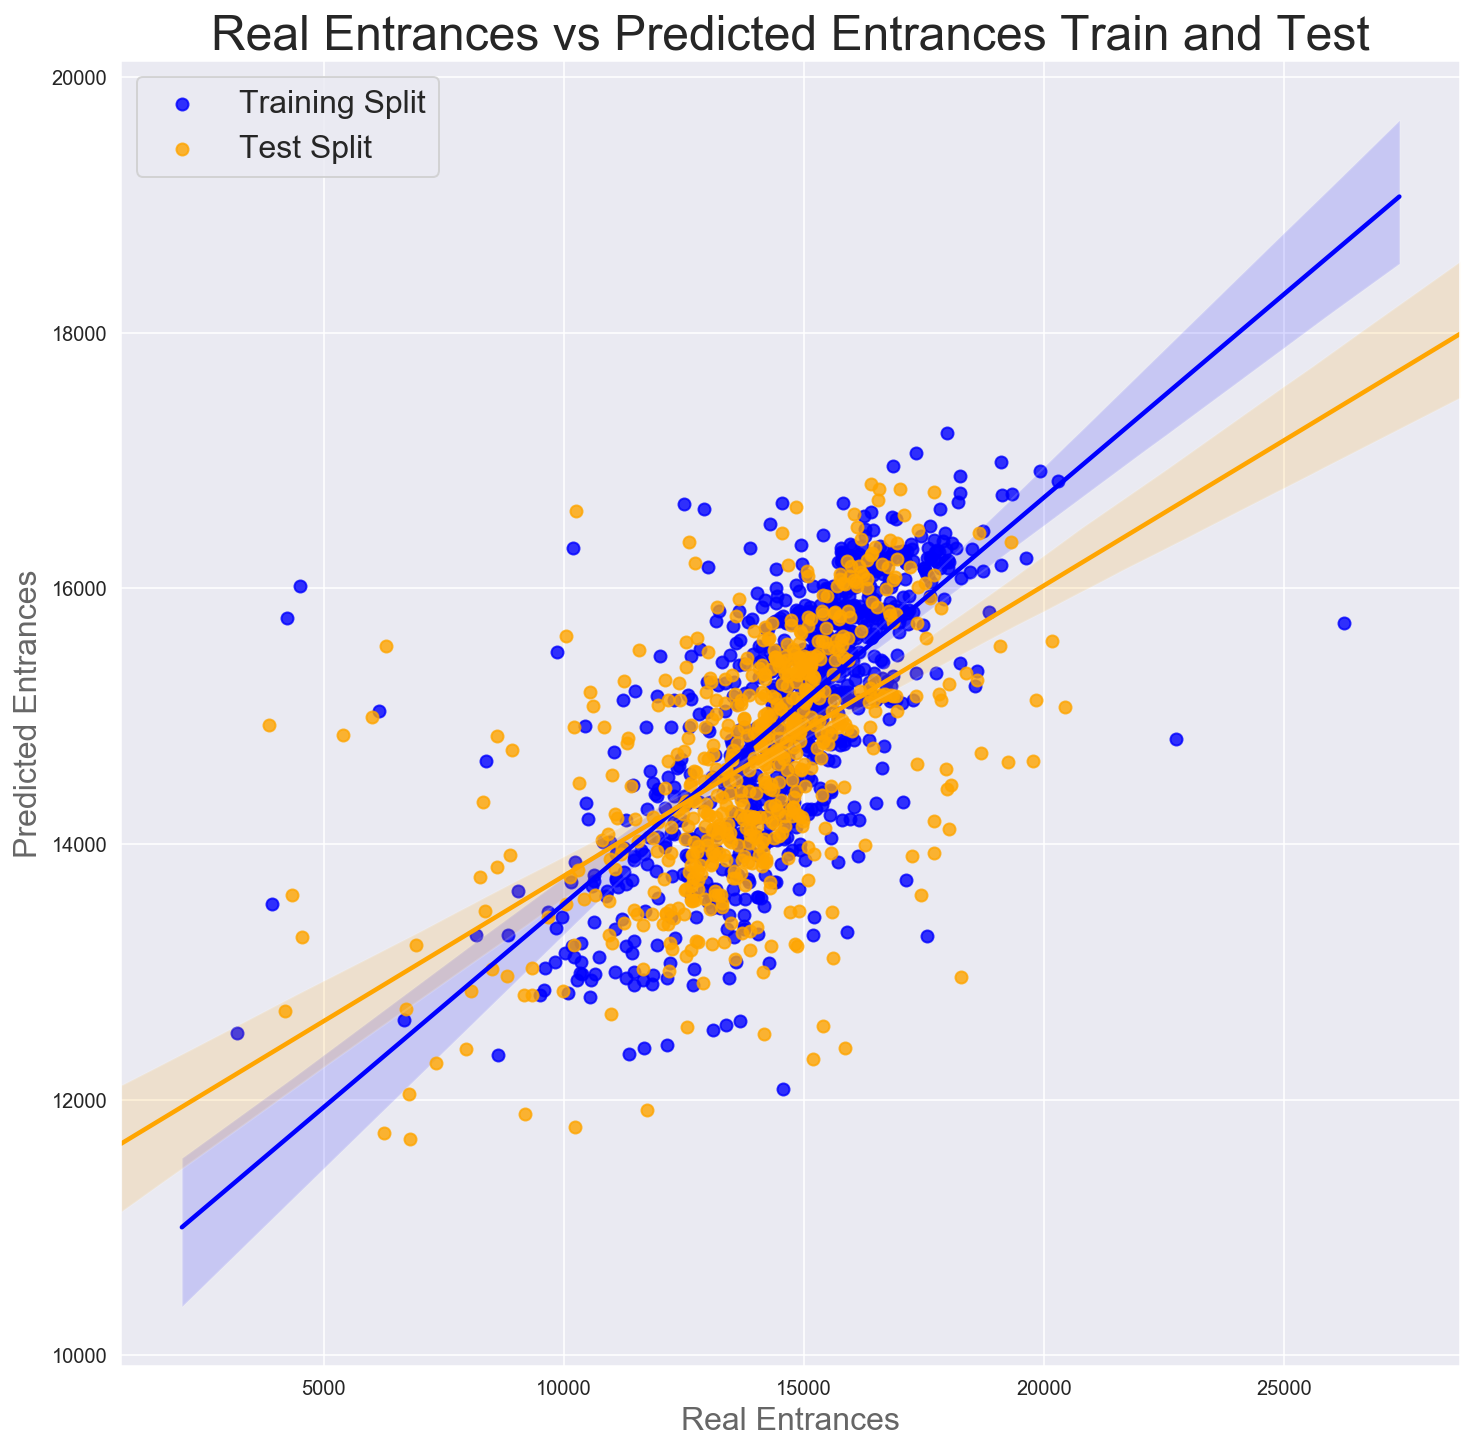

In [129]:
#KNeighbors Regressor
model = KNeighborsRegressor(n_neighbors=37, weights='uniform', metric='minkowski', p=3)
model.fit(X_train_scaled,y_train)

scoring_metrics(model)

#### Decision Tree Regressor

In [102]:
params = {
    'min_samples_split' : [ 3, 4, 5, 6, 7],
    'min_samples_leaf' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30],
  }

gs_dt = GridSearchCV(DecisionTreeRegressor(), param_grid=params, verbose=2, cv=3, n_jobs=3)
gs_dt.fit(X_train, y_train)

print(gs_dt.best_params_)
print(gs_dt.best_score_)

Fitting 3 folds for each of 102 candidates, totalling 306 fits


[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:    5.2s


{'min_samples_leaf': 2, 'min_samples_split': 3}
0.9862225719075246


[Parallel(n_jobs=3)]: Done 306 out of 306 | elapsed:    5.7s finished


5 fold cross validation:  [ 0.01738652  0.07906035  0.34565436 -0.136719   -0.12722783]
Mean of 5 fold cross validatoin:  0.015504028703222445
RMSE on Training set : 1688.9920588765574
RMSE on Test set : 2056.719196691079
R2 train:  0.9291583023111423
R2 test:  0.29637842646989543


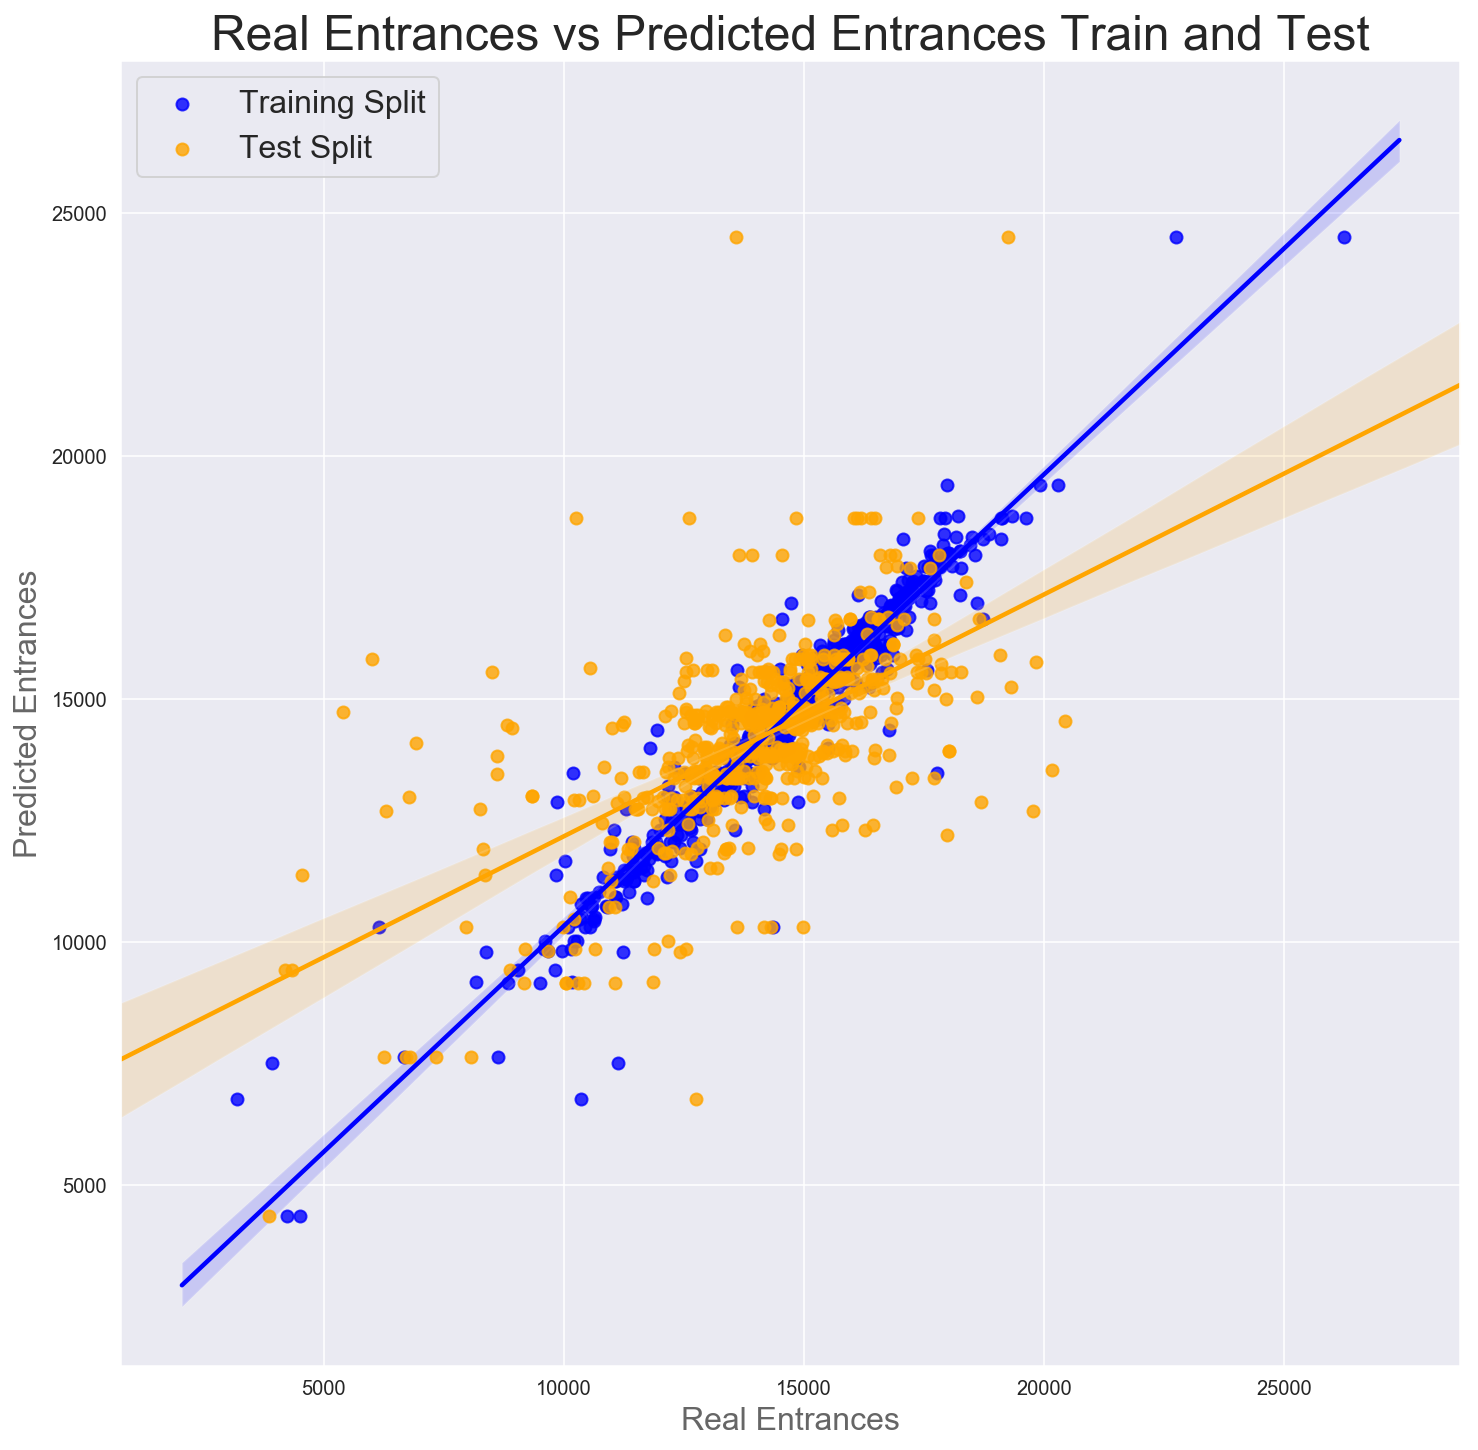

In [130]:
#Deision Tree Regressor
model = DecisionTreeRegressor(min_samples_leaf =2, min_samples_split=3)
model.fit(X_train_scaled,y_train)

scoring_metrics(model)

#### Baggin Regressor

In [105]:
params = {
    'max_features' : [0.5,0.55,0.6,0.65, 0.7, 0.75, 0.8, 0.85, 0.90, 0.95, 1.0],
    'n_estimators': [100, 200, 300, 350, 400, 450, 500],
}


gs_br = GridSearchCV(BaggingRegressor(), param_grid=params, verbose=2, cv=3, n_jobs=3)
gs_br.fit(X_train, y_train)

print(gs_br.best_params_)
print(gs_br.best_score_)

Fitting 3 folds for each of 77 candidates, totalling 231 fits


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   20.5s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  1.5min
[Parallel(n_jobs=3)]: Done 231 out of 231 | elapsed:  2.3min finished


{'max_features': 1.0, 'n_estimators': 300}
0.9818620735676157


5 fold cross validation:  [-0.01180597  0.02507153  0.05091833  0.00425476 -0.03004236]
Mean of 5 fold cross validatoin:  0.0063676278251775685
RMSE on Training set : 1930.4469314567482
RMSE on Test set : 2161.922529844954
R2 train:  0.24191759141529
R2 test:  0.010188749375837802


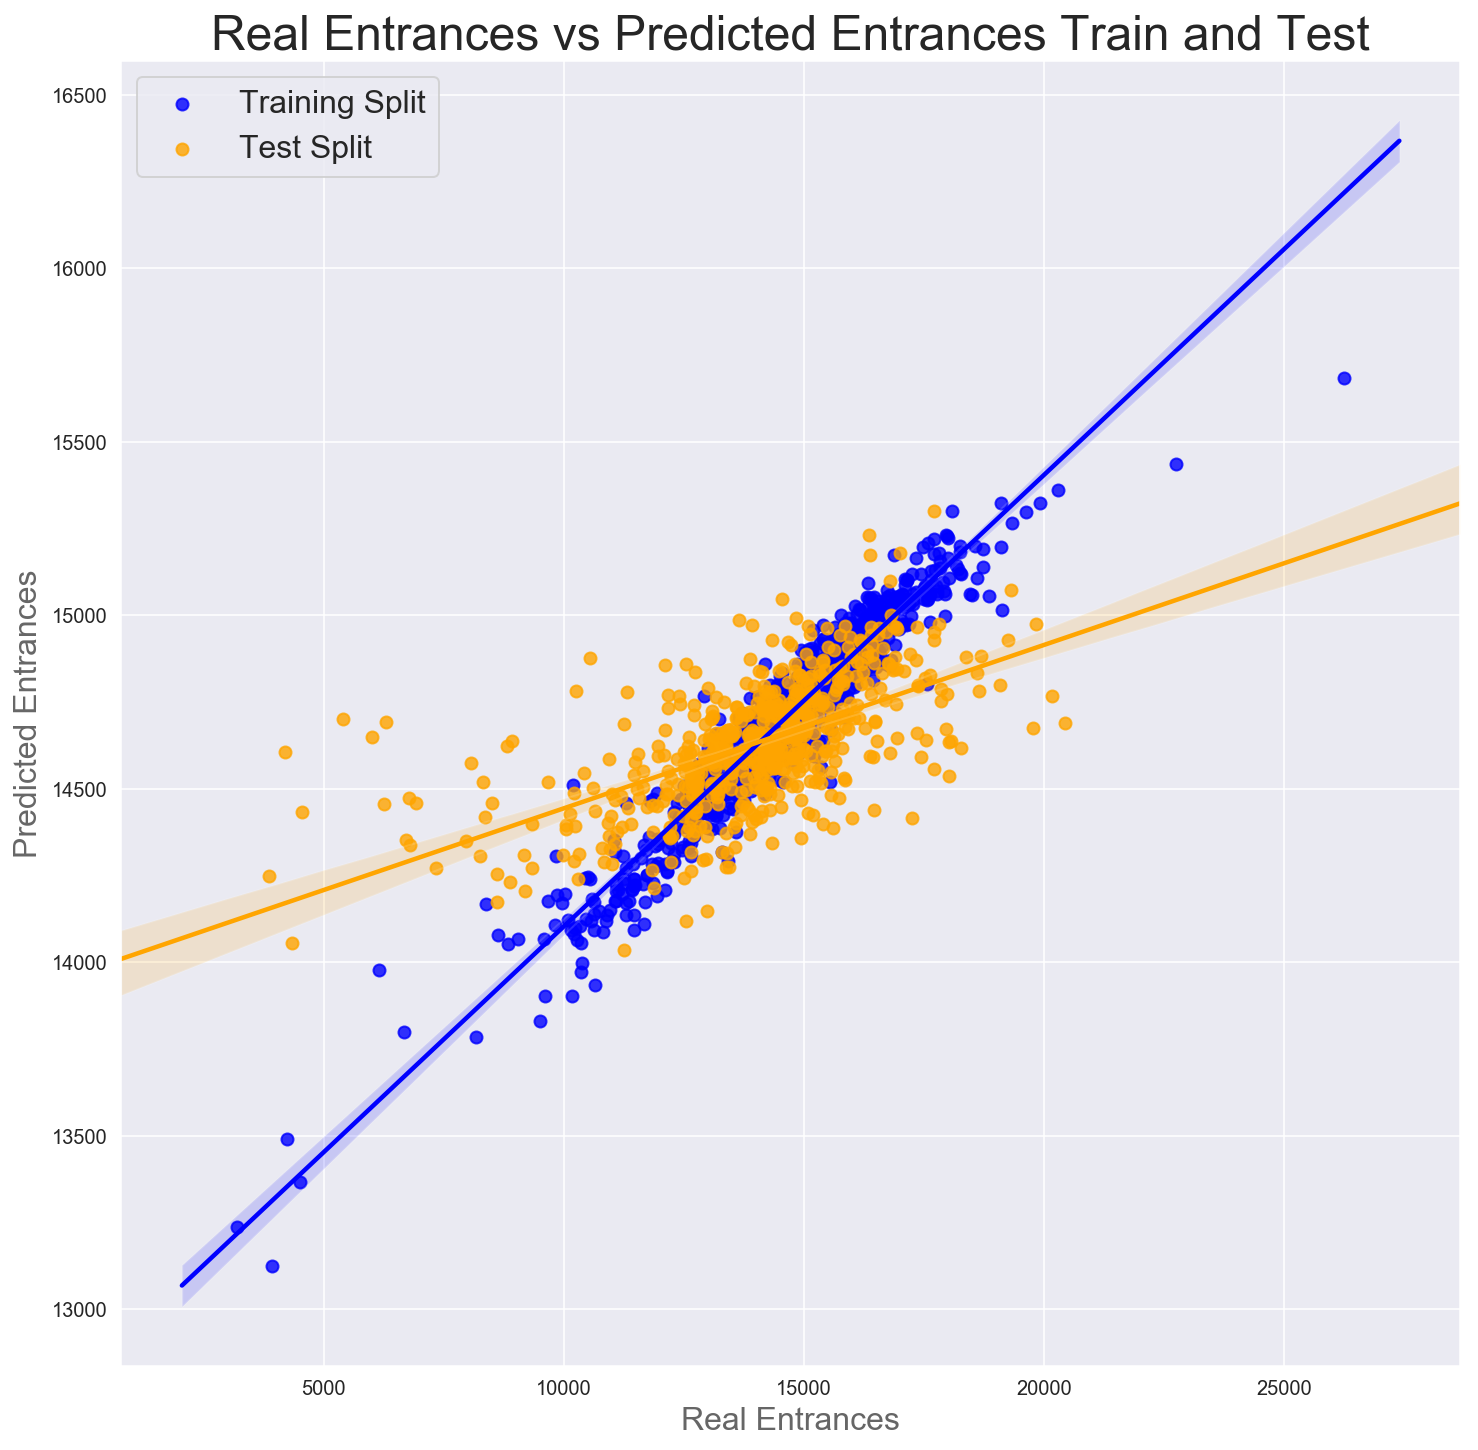

In [131]:
#Bagin Regressor
model = BaggingRegressor(max_features=1, n_estimators=300)
model.fit(X_train_scaled,y_train)

scoring_metrics(model)

#### Random Forest Regressor

In [135]:
params = {
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': range(2, 6, 1),
    'n_estimators': [250, 300],
}

gs_rf = GridSearchCV(RandomForestRegressor(), param_grid=params, verbose=2, cv=3, n_jobs=3)
gs_rf.fit(X_train, y_train)

print(gs_rf.best_params_)
print(gs_rf.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   21.5s
[Parallel(n_jobs=3)]: Done  54 out of  54 | elapsed:   30.7s finished


{'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 300}
0.9823207935911297


5 fold cross validation:  [0.48031422 0.55714027 0.42658076 0.42326527 0.3878365 ]
Mean of 5 fold cross validatoin:  0.46160900501506286
RMSE on Training set : 1249.033116464365
RMSE on Test set : 1595.2249139886762
R2 train:  0.8876336532355182
R2 test:  0.4922666707030494


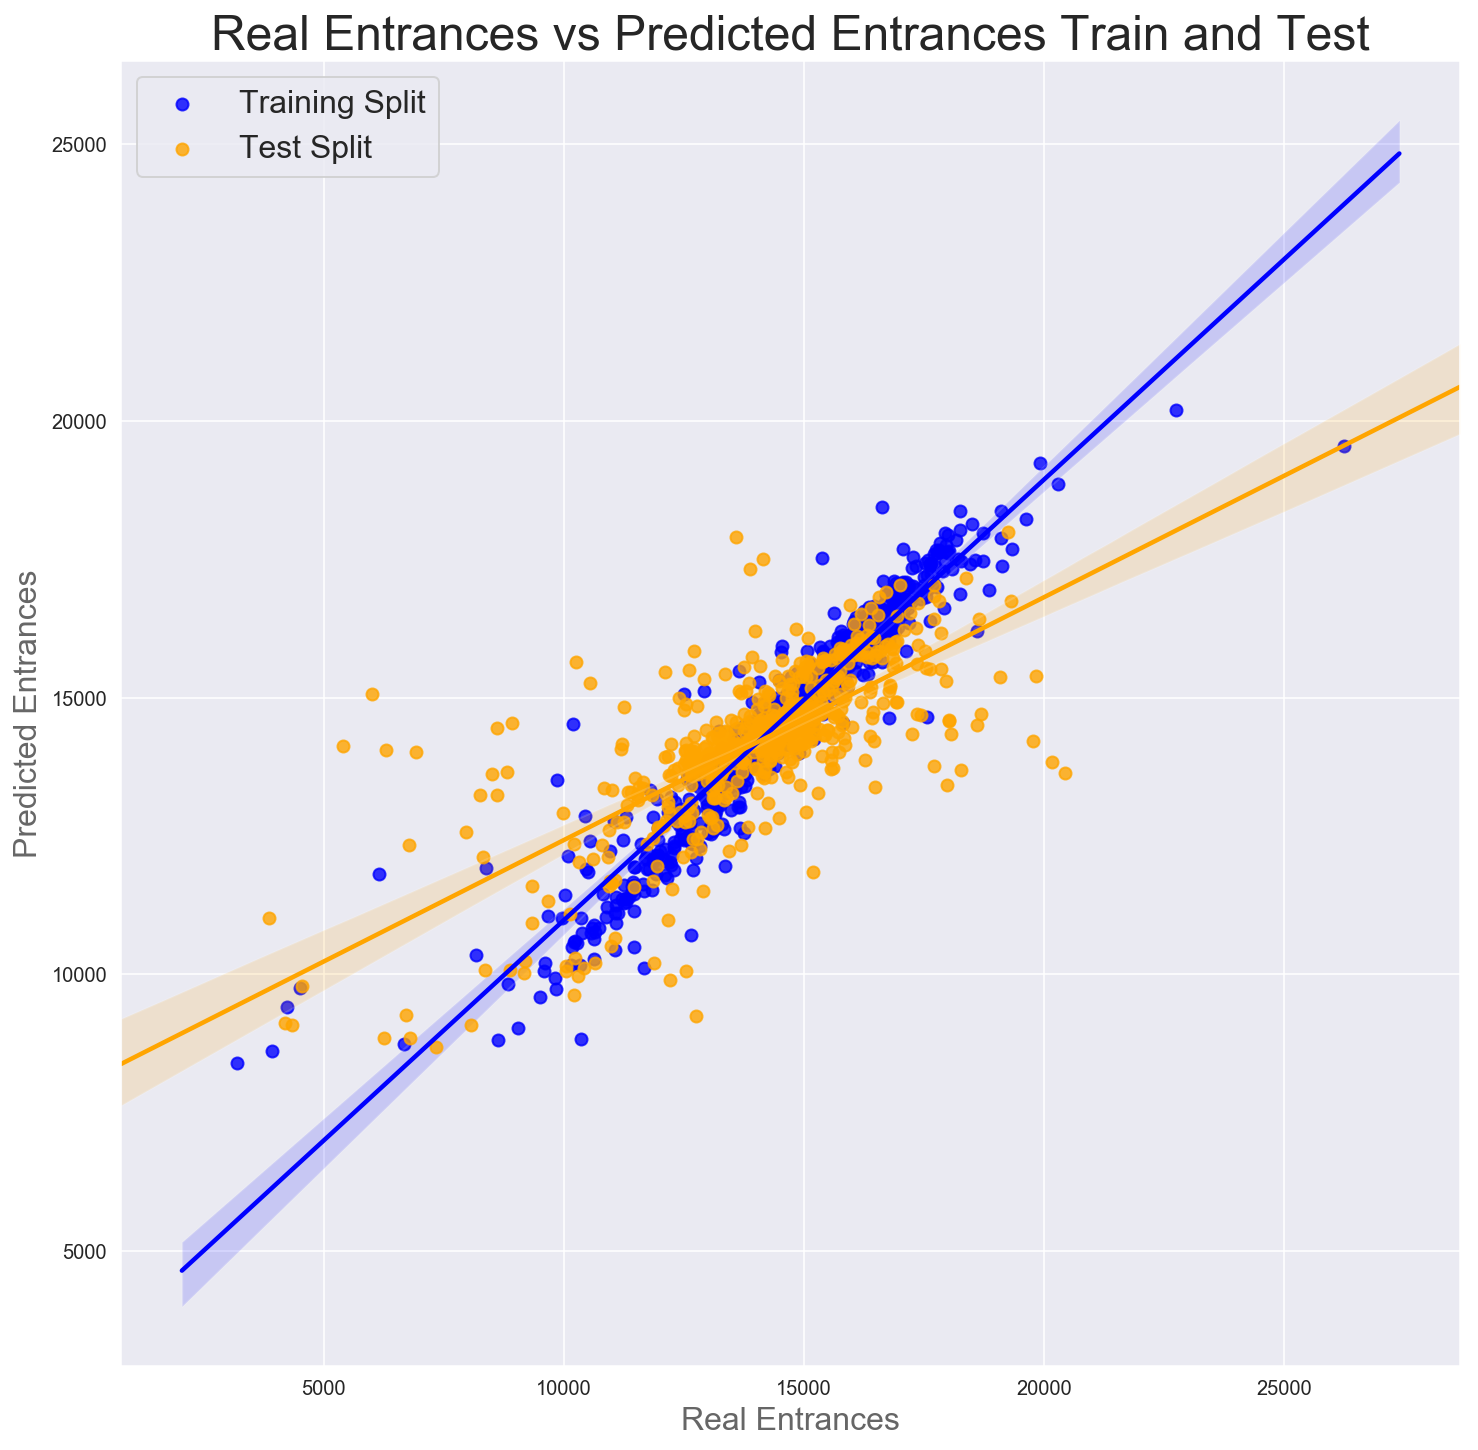

In [137]:
#Random Forest Regressor
model = RandomForestRegressor(min_samples_leaf=2, min_samples_split = 4, n_estimators=300)
model.fit(X_train_scaled,y_train)

scoring_metrics(model)

#### AdaBoost Regressor

In [117]:
ada = AdaBoostRegressor()
ada_params = {
    'n_estimators': [2, 3, 4, 5, 10, 12, 14, 16, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'learning_rate' :  [.7, .75, .8, .85, .9, .95, 1.0, 1.05, 1.1]
}
gs = GridSearchCV(ada, param_grid = ada_params, verbose=1 , n_jobs=3, cv=3)
gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)

Fitting 3 folds for each of 171 candidates, totalling 513 fits


[Parallel(n_jobs=3)]: Done  57 tasks      | elapsed:    6.6s
[Parallel(n_jobs=3)]: Done 357 tasks      | elapsed:   14.6s
[Parallel(n_jobs=3)]: Done 513 out of 513 | elapsed:   19.0s finished


{'learning_rate': 1.0, 'n_estimators': 30}
0.9744226787752861


[0.1828014  0.23203595 0.31472213 0.27197838 0.10016424]
0.1594914125127723
RMSE on Training set : 1592.9221451493304
RMSE on Test set : 1983.8314816699112
R2 train:  0.5363477518973401
R2 test:  0.2677754935551304


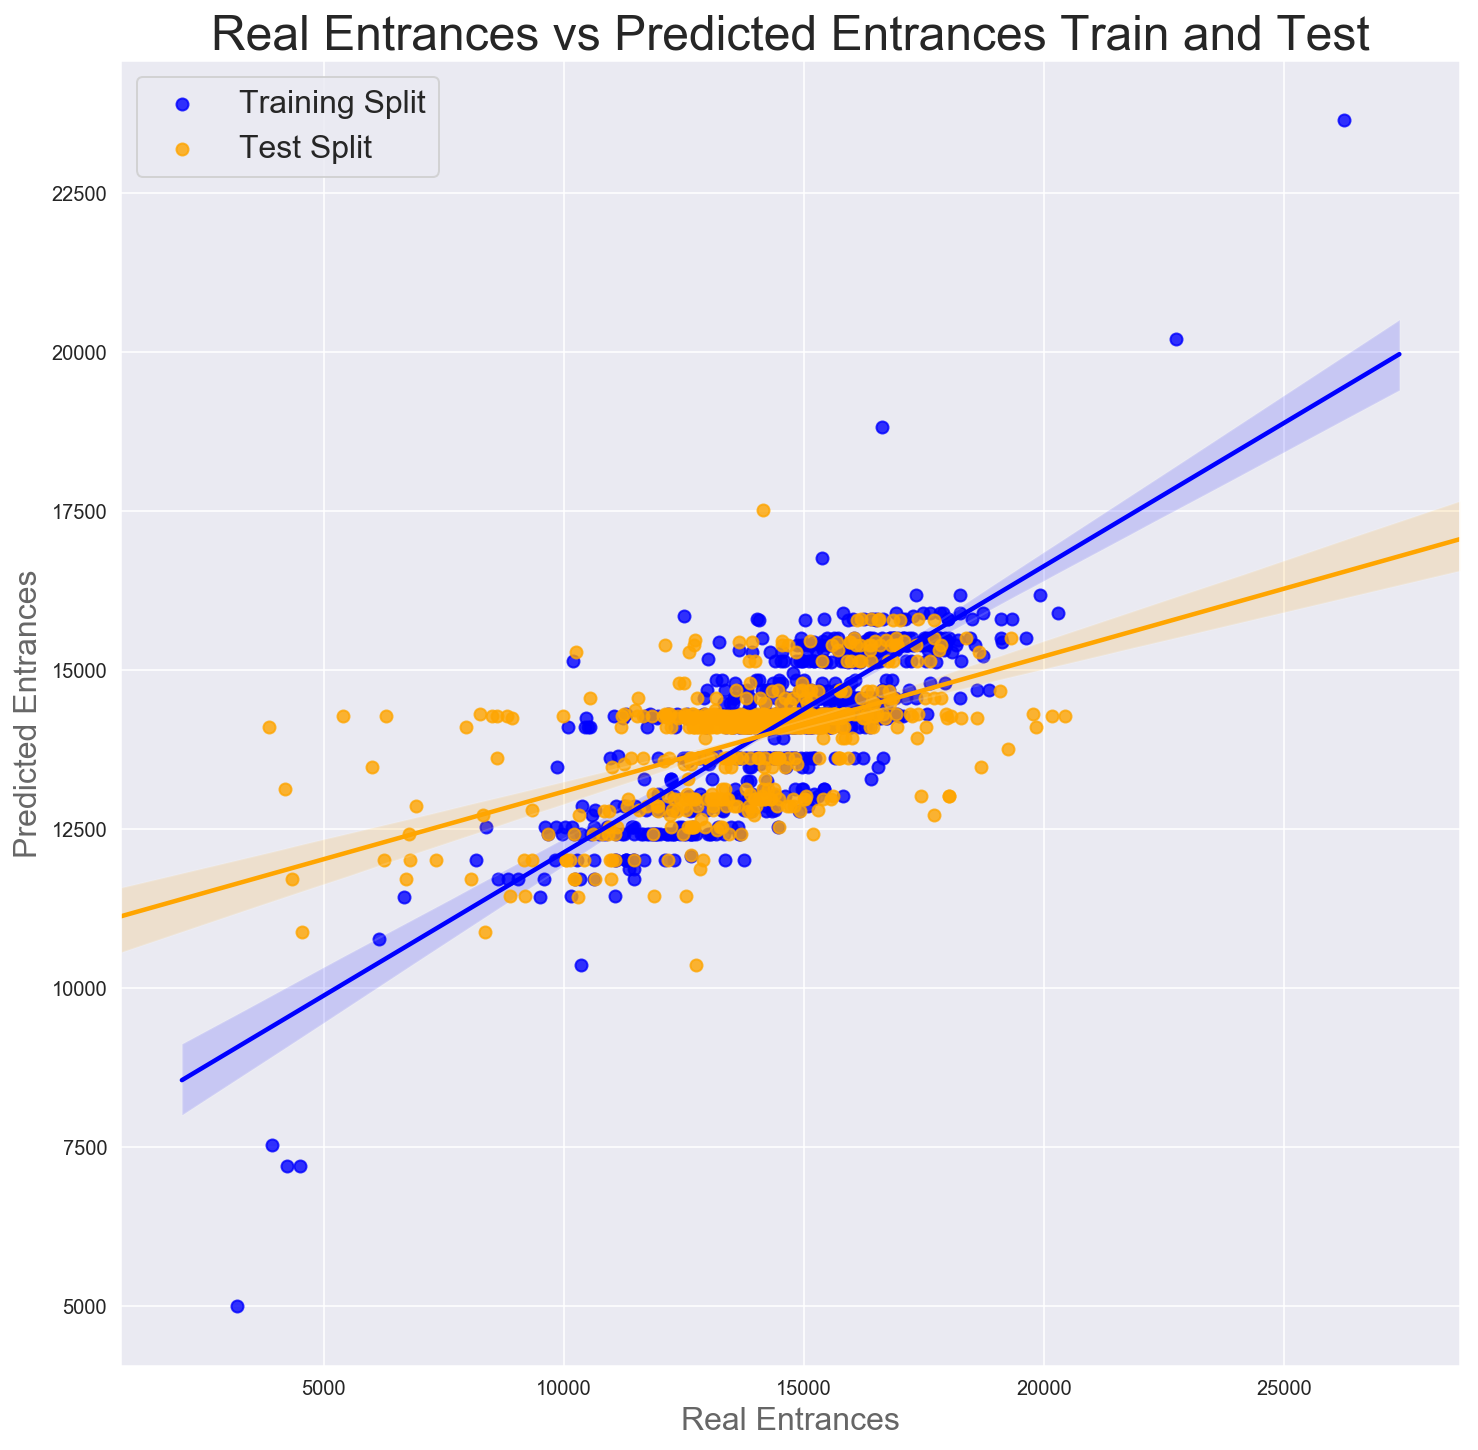

In [123]:
#AdaBoost Regressor
model = AdaBoostRegressor(n_estimators = 30, learning_rate=1.0)
model.fit(X_train_scaled,y_train)

scoring_metrics(model)